# PASSION FOOTWEAR

**Business Data:** orders_export_1.csv, orders_export_2.csv,  orders_export_3.csv, orders_export_4.csv, orders_export_5.csv 

* Combined Csv file is created : 'merged_data_o.csv'

* Three additional csv created as subset from 'merged_data_o.csv':

  cleaned_orders_P.csv :  Orders Details 
  
  Line_item.csv : Lineitem/Product Details 
  
  customer.csv: Customer Details 

**Key Points for Analysis:**


**Revenue analysis|Customer order frequency|Average time between orders|Cohort Analysis|Geographic Analysis :** 'whole dataset' is considered. 

**Customer Lifetime Value:** calculated for 3.5 years with option to toggle the years.
    
**Subset of the dataset called 'df_combo'** to reduce the complexity of our analysis and to understand the Line-Item Patterns, so Product combinations, Product-Accessories , Color Pattern and Size Pattern is analyzed based on this.

**Retention Rate|comparing the New and Retained customers:** Client mentioned that the last quarter of 2023 had a splurge of orders due to the marketing campaign, hence excluded those upon request.

**For Temporal analysis|Shopping Pattern| Customer Profiling:** 'whole dataset' for the last quarter of 2023 and First Quarter of 2024(dataset has data for Jan'24) only.

**For Purchase Frequency:** as requested by client excluded the orders from Jan'24

# Contents 

1. [Import Necessary Libraries and Input files](#Import-Necessary-Libraries-and-Input-files)


2. [EDA AND VISUALISATION alongside Pandas Profiling ](#EDA-AND-VISUALISATION-alongside-Pandas-Profiling)


3. [Sales Trend (yearly, monthly, quarterly)](#Sales-Trend-(yearly,-monthly,-quarterly))


4. [Revenue Analysis](#Revenue-Analysis)


5. [Customer Order Frequency](#Customer-Order-Frequency)


6. [Days between Orders](#Days-between-Orders)


7. [Purchase Frequency](#Purchase-Frequency)


8. [Customer Lifetime Value (CLV)](#Customer-Lifetime-Value-(CLV))


9. [Rentention rate of Customers](#Rentention-rate-of-Customers)

10.[Quarterly analysis (New & Retained customers)](#Quarterly-analysis-(New-&-Retained-customers))

11.[Cohort Analysis](#Cohort-Analysis)

12.[Customer Geographic Analysis](#Customer-Geographic-Analysis)

12.1 [Country with Highest Billing](#1.-Country-with-Highest-Billing)   

12.2 [Sales by Billing_country and Province](#2.-Sales-by-Billing_country-and-Province)

12.3 [Sales by Billing_Province and Billing_City](#3.-Sales-by-Billing_Province-and-Billing_City)

12.4 [International Countries with highest billing](#4.-International-Countries-with-highest-billing)

12.5 [Top Lineitems by Sales in each country](#5.-Top-Lineitems-by-Sales-in-each-country)
   
13.[Lineitem Breakdown](#Lineitem-Breakdown)   

13.1[Categorisation of Lineitem_name Columns](#Categorisation-of-Lineitem_name-Columns)
   
13.2[Explore the 5 Types (Services, Combo, Accessories, Gift Cards, Shoes)](#Explore-the-5-Types-(Services,-Combo,-Accessories,-Gift-Cards,-Shoes))  

13.2.1[Study Shoes](#Study-Shoes-:-)
   
13.2.2[Study Accessories](#Study-Accessories:-Flare-Heel-Kits,-Block-Heel-Kits,-Stiletto-Heel-Kits,-Stelo-support,-Toe-clips,-Ankle-bows,-Flat-Caps)
   
13.2.3[Study Services](#Study-Services:-Onward-VIP-Protection,-Sustainability-&-Coverage,-Green-Shipping-Protection)
   
13.2.4[Study Gift Cards](#Study-Gift-Cards:)
   
13.2.5[Study Combos](#Study-Combos:)
   
13.3[Top Product-Product Combinations](#Top-Product-Product-Combinations)

13.4[Top Product-Accessories Combination](#Top-Product-Accessories-Combination)

13.5[Color Pattern for each Lineitem](#Color-Pattern-for-each-Lineitem)

13.6[Size Pattern for each Lineitem](#Size-Pattern-for-each-Lineitem)

14.[Shopping Pattern](#Shopping-Pattern)
   
15.[Temporal Purchase Patterns](#Temporal-Purchase-Patterns)
   
16.[Top Product in each Item_type](#Top-Product-in-each-Item_type)
   
17.[Lineitem Combinations purchased by Customers](#Lineitem-Combinations-purchased-by-Customers)  

18.[Customer_Profiling](#Customer_Profiling)

19.[Clustering customers](#Clustering-customers)

20.[Key Findings](#KEY-Findings:)

## Import Necessary Libraries and Input files

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from plotly.graph_objects import Sankey

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import re

from kmodes.kmodes import KModes

from ipywidgets import interactive, HBox, VBox
import colorsys

from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

import dash
from dash import dcc, html
from dash.dependencies import Input, Output

from itertools import combinations
from collections import Counter

from pandas_profiling import ProfileReport
import pytz



In [2]:
orders_df = pd.read_csv('cleaned_orders_P.csv')
lineitem_df = pd.read_csv('Line_item.csv')
customer_df = pd.read_csv('customer.csv')

merged_df = pd.read_csv("merged_data_o.csv")

pd.set_option('display.max_rows', None)

## EDA AND VISUALISATION alongside Pandas Profiling 

In [3]:
# # Generate the Panadas data profile report
# profile = ProfileReport(merged_df, title='Pandas Profiling Report', explorative=True)

# # Display the report in a Jupyter notebook (if you are using Jupyter)
# profile.to_notebook_iframe()

# # Alternatively, you can save the report to an HTML file
# profile.to_file("MergedDataProfiling.html")

In [4]:
orders_eda = {
    'head': orders_df.head(),
    'shape': orders_df.shape,
    'description': orders_df.describe()
}

lineitem_eda = {
    'head': lineitem_df.head(),
    'shape': lineitem_df.shape,
    'description': lineitem_df.describe()
}

customer_eda = {
    'head': customer_df.head(),
    'shape': customer_df.shape,
    'description': customer_df.describe()
}

merged_eda = {
    'head': merged_df.head(),
    'shape': merged_df.shape,
    'description': merged_df.describe()
}

In [5]:
orders_df['Total'].describe()

count    46382.000000
mean       160.901373
std        118.408107
min          0.000000
25%         90.740000
50%        156.000000
75%        204.890000
max       2337.540000
Name: Total, dtype: float64

Average Value of Orders : $160 

No. of Orders: 46382

#### Checking the Datatypes

In [6]:
customer_df.info()
lineitem_df.info()
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46381 entries, 0 to 46380
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order_ID          46381 non-null  object
 1   Email             46187 non-null  object
 2   Billing_Name      46381 non-null  object
 3   Billing_Street    46381 non-null  object
 4   Billing_Address1  46381 non-null  object
 5   Billing_Address2  46381 non-null  object
 6   Billing_Company   46381 non-null  object
 7   Billing_City      46381 non-null  object
 8   Billing_Zip       46381 non-null  object
 9   Billing_Province  46381 non-null  object
 10  Billing_Country   46381 non-null  object
 11  Billing_Phone     46381 non-null  object
dtypes: object(12)
memory usage: 4.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107291 entries, 0 to 107290
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --

In [7]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107291 entries, 0 to 107290
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Name                         107291 non-null  object 
 1   Email                        107005 non-null  object 
 2   Financial Status             46382 non-null   object 
 3   Paid at                      40636 non-null   object 
 4   Fulfillment Status           46382 non-null   object 
 5   Fulfilled at                 44911 non-null   object 
 6   Accepts Marketing            46382 non-null   object 
 7   Currency                     46382 non-null   object 
 8   Subtotal                     46382 non-null   float64
 9   Shipping                     46382 non-null   float64
 10  Taxes                        46382 non-null   float64
 11  Total                        46382 non-null   float64
 12  Discount Code                30916 non-null   object 
 13 

#### Change Datatypes for required columns 

In [8]:
# Convert the specified columns to datetime format[MergedDf]
datetime_columns = ['Paid at', 'Fulfilled at', 'Created at', 'Cancelled at']

for col in datetime_columns:
    merged_df[col] = pd.to_datetime(merged_df[col], format='%Y-%m-%d %H:%M:%S', errors='coerce', utc=True)

# Verify the datatype conversion by printing the dtypes of these columns
converted_dtypes = merged_df[datetime_columns].dtypes

#Only dates, get rid of timestamp
merged_df["Paid at"] = merged_df["Paid at"].dt.date

print(converted_dtypes)

Paid at         datetime64[ns, UTC]
Fulfilled at    datetime64[ns, UTC]
Created at      datetime64[ns, UTC]
Cancelled at    datetime64[ns, UTC]
dtype: object


#### Checking the missing values

In [9]:
customer_df.isnull().sum()

Order_ID              0
Email               194
Billing_Name          0
Billing_Street        0
Billing_Address1      0
Billing_Address2      0
Billing_Company       0
Billing_City          0
Billing_Zip           0
Billing_Province      0
Billing_Country       0
Billing_Phone         0
dtype: int64

In [10]:
orders_df.isnull().sum()

Order_ID                  0
Email                     0
Financial_Status          0
Paid_at                   0
Fulfillment_Status        0
Fulfilled_at              0
Accepts_Marketing         0
Currency                  0
Subtotal                  0
Shipping                  0
Taxes                     0
Total                     0
Discount_Code             0
Discount_Amount           0
Shipping_Method           0
Created_at                0
Cancelled_at          45158
Payment_Method            0
Refunded_Amount           0
Vendor                    4
Id                        0
Tags                      0
Risk Level                0
Source                    0
Lineitem_discount         0
dtype: int64

In [11]:
lineitem_df.isnull().sum()

Unnamed: 0                     0
Lineitem ID                    0
Order_ID                       0
Lineitem_quantity              0
Lineitem_name                  0
Lineitem_price                 0
Lineitem_compare_at_price      0
Lineitem_sku                   0
Lineitem_requires_shipping     0
Lineitem_taxable               0
Lineitem_fulfillment_status    0
Item_Type                      0
dtype: int64

#### Correlation matrix : to identify relationship between variables and feature selection

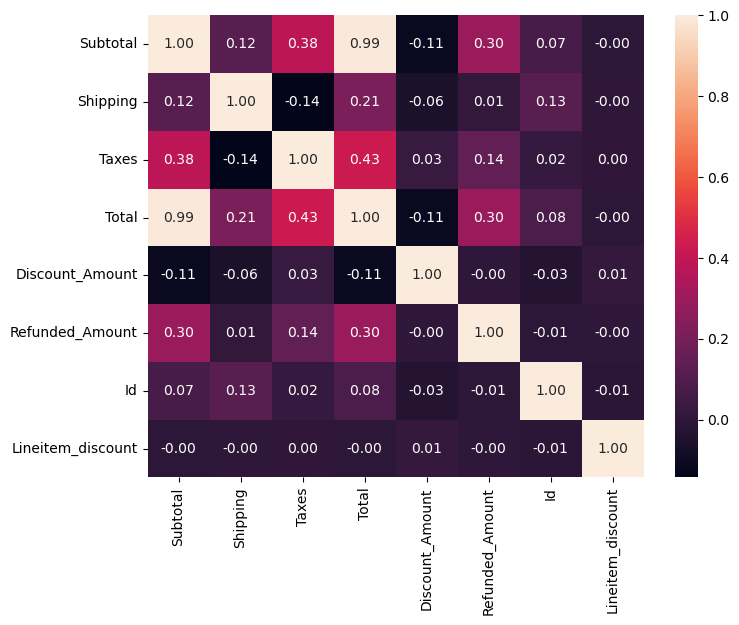

In [12]:
#heatmap of orders.csv 
plt.figure(figsize=(8, 6))
sns.heatmap(orders_df.corr(), annot=True, fmt=".2f")
plt.show()

High Correlation Between Subtotal and Total: 0.99 

Moderate Correlation Between Taxes and Total: 0.43

Negative Correlation Between Shipping and Taxes: -0.14

Explaining how different financial components interact within transactions.

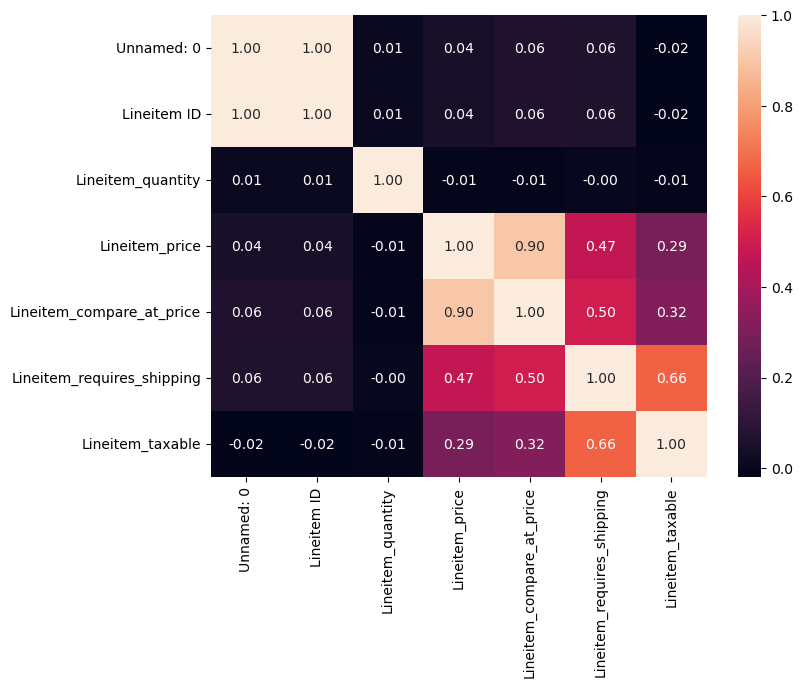

In [13]:
#heatmap of lineitem.csv
plt.figure(figsize=(8, 6))
sns.heatmap(lineitem_df.corr(), annot=True, fmt=".2f")
plt.show()

Strong Correlation Between Lineitem_price and Lineitem_compare_at_price: 0.90

Moderate Correlation Between Lineitem_requires_shipping and Lineitem_taxable:0.66

Moderate Correlation Between Lineitem_compare_at_price and Lineitem_requires_shipping: 0.50

Explaining how different aspects of line items in sales data are interconnected.

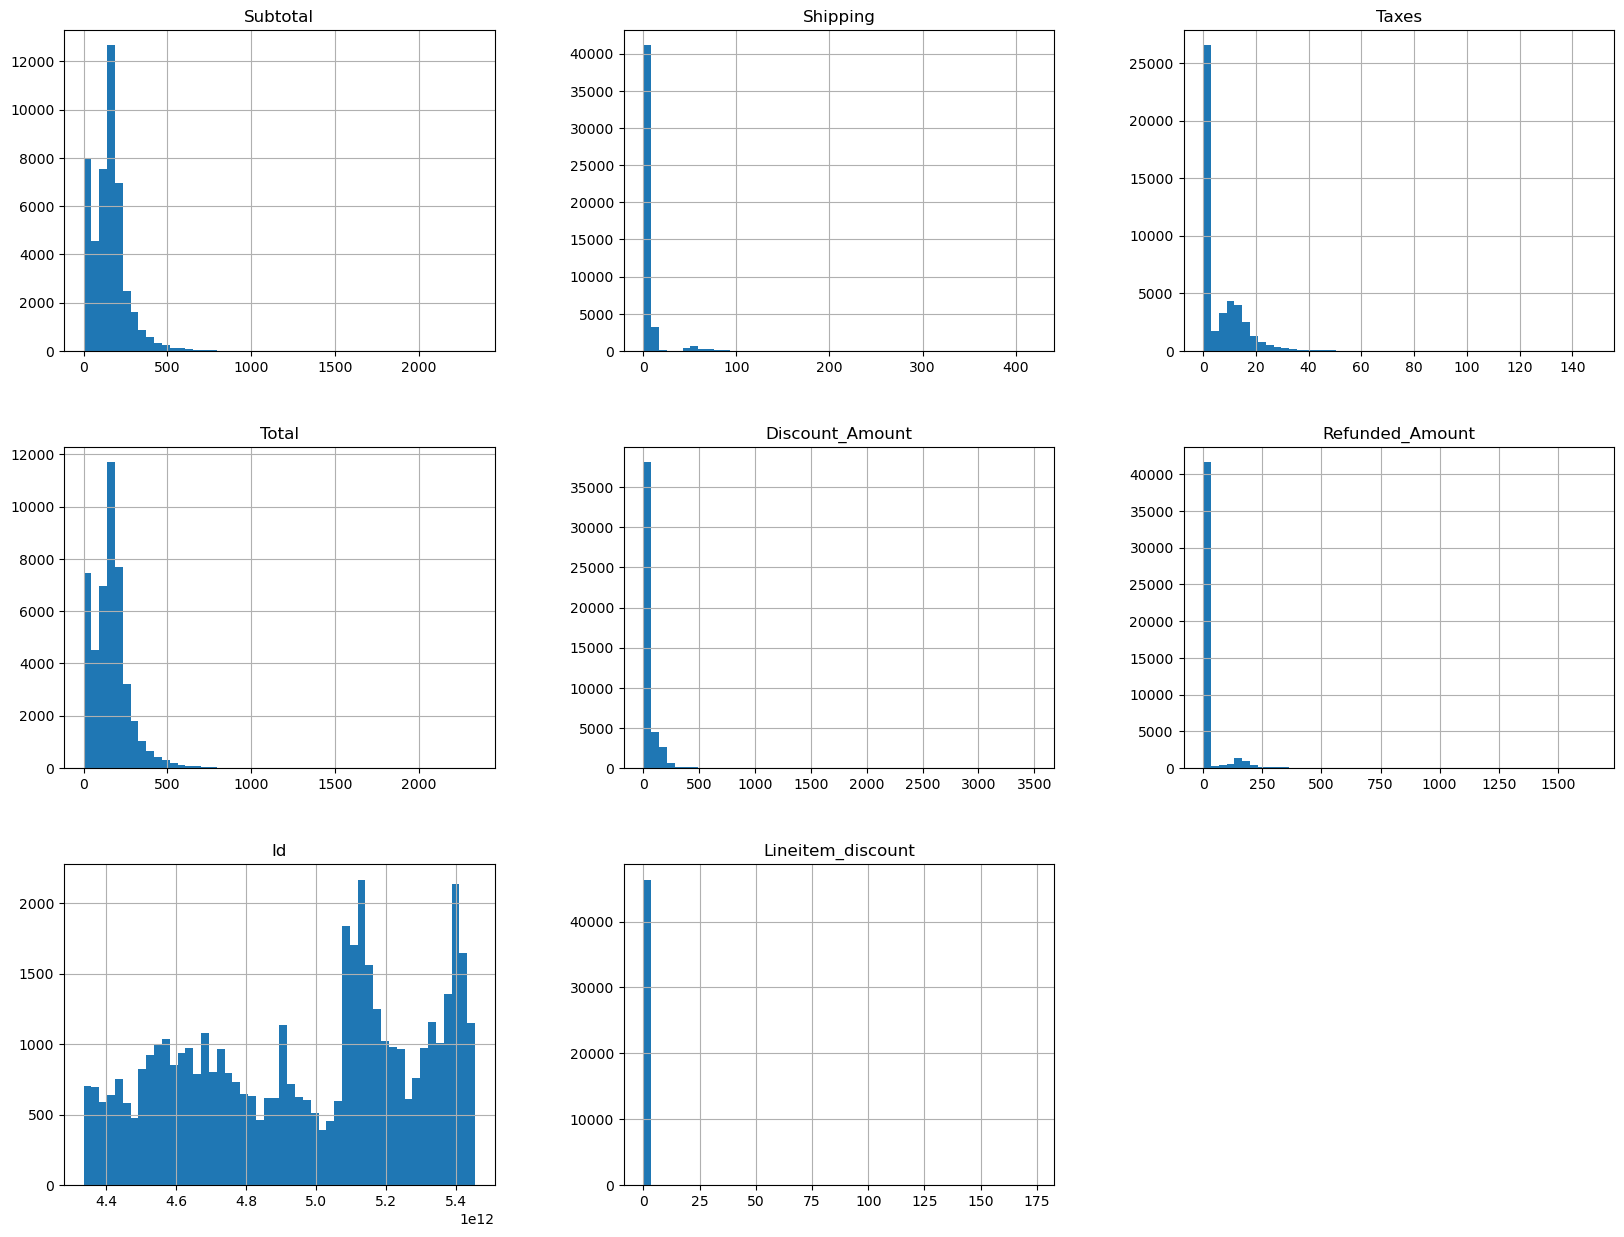

In [14]:
#Distribution of Numerical Variables
orders_df.hist(bins=50, figsize=(20, 15))
plt.show()

Right-Skewed Distributions for Financial Variables('Subtotal', 'Total', 'Shipping', 'Discount Amount', and 'Refunded Amount') suggests that most transactions have lower values for these variables, with a few transactions having very high values.

Majority of transactions have low discount values, with a steep drop as the discount amount increases.

Low Variability in Taxes and Refunded Amounts show that most transactions have a relatively low amount of taxes and refunds, respectively.

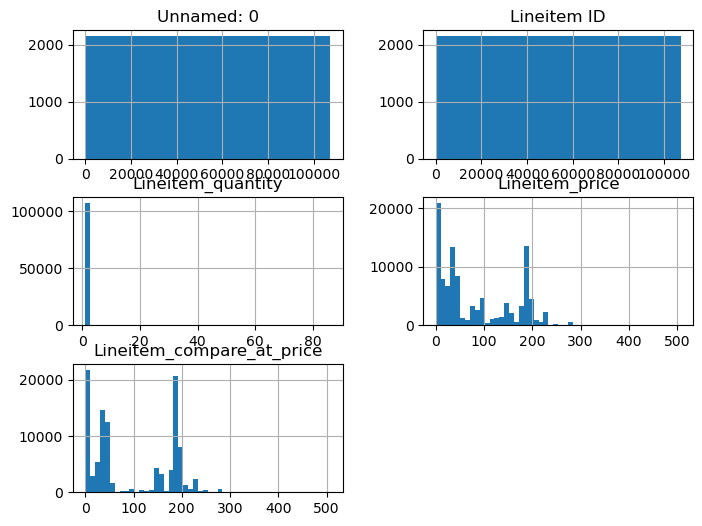

In [15]:
#Distribution of Numerical Variables
lineitem_df.hist(bins=50, figsize=(8, 6))
plt.show()

High Frequency of Low Lineitem Prices and Compare-at Prices suggesting popular price brackets for items is upto $200.

Extremely right-skewed distribution for Lineitem_quantity  shows bulk purchases are rare. 

Peaks in Lineitem_compare_at_price shows the prices that are perceived as attractive or standard by customers.

## 1.  Sales Trend (yearly, monthly, quarterly) 

In [16]:
# Convert the specified columns to datetime format
datetime_columns = ['Paid_at', 'Fulfilled_at', 'Created_at', 'Cancelled_at']

for col in datetime_columns:
    orders_df[col] = pd.to_datetime(orders_df[col], format='%Y-%m-%d %H:%M:%S', errors='coerce', utc=True)

# Verify the datatype conversion by printing the dtypes of these columns
converted_dtypes = orders_df[datetime_columns].dtypes

print(converted_dtypes)
# orders_df.info()

Paid_at         datetime64[ns, UTC]
Fulfilled_at    datetime64[ns, UTC]
Created_at      datetime64[ns, UTC]
Cancelled_at    datetime64[ns, UTC]
dtype: object


In [17]:
orders_df['Year_Month'] = orders_df['Paid_at'].dt.to_period('M')
monthly_sales = orders_df.groupby('Year_Month')['Total'].sum().reset_index()


# Initialize the Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1('Total Sales Visualization'),
    dcc.Dropdown(
        id='time-granularity-selector',
        options=[
            {'label': 'Monthly', 'value': 'M'},
            {'label': 'Quarterly', 'value': 'Q'},
            {'label': 'Yearly', 'value': 'Y'}
        ],
        value='M',  # Default view
        clearable=False
    ),
    dcc.Graph(id='sales-graph')
])

@app.callback(
    Output('sales-graph', 'figure'),
    [Input('time-granularity-selector', 'value')]
)
def update_figure(selected_granularity):
    if selected_granularity == 'Y':
        df = monthly_sales.groupby(monthly_sales['Year_Month'].dt.year)['Total'].sum().reset_index()
        df.columns = ['Year', 'Total']
        fig = go.Figure(go.Scatter(x=df['Year'], y=df['Total'], mode='lines+markers'))
        fig.update_layout(title='Total Sales per Year', xaxis_title='Year', yaxis_title='Total Sales')
    elif selected_granularity == 'Q':
        # Aggregate data by quarter for quarterly view
        df = monthly_sales.groupby(monthly_sales['Year_Month'].dt.to_timestamp().dt.to_period('Q'))['Total'].sum().reset_index()
        df.columns = ['Quarter', 'Total']
        df['Quarter'] = df['Quarter'].astype(str)  # Converting to string for Plotly compatibility
        fig = go.Figure(go.Scatter(x=df['Quarter'], y=df['Total'], mode='lines+markers'))
        fig.update_layout(title='Total Sales per Quarter', xaxis_title='Quarter', yaxis_title='Total Sales', xaxis_tickangle=45)
    else:
        # Use the original data for monthly view
        df = monthly_sales.copy()
        df['Year_Month'] = df['Year_Month'].astype(str)  # Converting to string for Plotly compatibility
        fig = go.Figure(go.Scatter(x=df['Year_Month'], y=df['Total'], mode='lines+markers'))
        fig.update_layout(title='Total Sales per Month', xaxis_title='Month', yaxis_title='Total Sales', xaxis_tickangle=45)
    return fig

if __name__ == '__main__':
    app.run_server(debug=True, port=8052)


We can see amount of sales over the period on monthly/quarterly/yearly basis. 

In [18]:
#SUBSET OF ORDERS_DF(selective columns only)

Or1 = orders_df[['Order_ID', 'Email', 'Paid_at', 'Total', 'Refunded_Amount', 'Discount_Amount']]

## Revenue Analysis
### Revenue = Total - Refunded_amount

In [ ]:
# Revenue Computation
Or1['Revenue'] = Or1['Total'] - Or1['Refunded_Amount']

Or1 = Or1.sort_values(by = ["Revenue", "Paid_at"], ascending = False)

# Extract month and year from 'Paid_at' column
Or1['YearMonth'] = Or1['Paid_at'].dt.to_period('M')

# Convert Period object to string
Or1['YearMonth'] = Or1['YearMonth'].astype(str)


# Group by YearMonth and count the number of orders, sum the 'Total' and 'Revenue' columns
monthly_purchase = Or1.groupby('YearMonth', as_index=False).agg({'Total': 'sum', 'Revenue': 'sum', 'Order_ID': 'count'})
monthly_purchase.rename(columns={'Order_ID': 'Number_of_Orders'}, inplace=True)


# Filter data until December 2023
monthly_purchase_filtered = monthly_purchase[monthly_purchase['YearMonth'] <= '2023-12']


# Plot the filtered data using Plotly
fig = go.Figure()

# Add trace for Total Purchase
fig.add_trace(go.Scatter(x=monthly_purchase_filtered['YearMonth'], y=monthly_purchase_filtered['Total'], mode='lines+markers',
                         name='Total Purchase', hovertemplate='Month: %{x}<br>Total Purchase: $%{y:,.2f}<br>Number of Orders: %{customdata[0]}',
                         customdata=monthly_purchase_filtered['Number_of_Orders']))

# Add trace for Revenue
fig.add_trace(go.Scatter(x=monthly_purchase_filtered['YearMonth'], y=monthly_purchase_filtered['Revenue'], mode='lines+markers',
                         name='Revenue', hovertemplate='Month: %{x}<br>Revenue: $%{y:,.2f}<br>Number of Orders: %{customdata[0]}',
                         customdata=monthly_purchase_filtered['Number_of_Orders']))

# Update layout
fig.update_layout(title_text="Monthly Purchase and Revenue Over Time",
                  xaxis_title="Year-Month",
                  yaxis_title="Amount ($)",
                  showlegend=True)

fig.show()

The resulting graph provides a visual representation of the monthly purchase and revenue trends from the available data

## Customer Order Frequency

In [20]:
# Creating new Customer Frequency Table from Customer Table with Order Table on 'Order_ID'
CUF = pd.merge(customer_df[['Order_ID', 'Billing_Name']], orders_df[['Order_ID', 'Email', 'Paid_at', 'Total', 'Refunded_Amount']], on='Order_ID', how='inner')

# Grouping the dataset by 'Billing_Name' and calculating various statistics
CPF = CUF.groupby('Email').agg(
    Order_ID=('Order_ID', 'first'),            # Order_ID to give unique number to customer
    Orders_Placed=('Order_ID', 'count'),       # Number of orders placed
    First_Order=('Paid_at', 'min'),            # Time of the first order
    Last_Order=('Paid_at', 'max'),             # Time of the last order
    Total_Amount=('Total', 'sum'),             # Total amount spent
    Refunded_Amount=('Refunded_Amount', 'sum') # Total Refunded Amount
)

# Sorting the results in descending order based on the number of orders placed
CPF = CPF.sort_values(by='Orders_Placed', ascending=False)

# Calculating time difference between consecutive orders for each customer
CUF['Time_Diff'] = CUF.groupby('Email')['Paid_at'].diff()

# Grouping the dataset by 'Billing_Name' and calculating the average time difference
avg_time_frequency = CUF.groupby('Email')['Time_Diff'].mean()

# Merging average time frequency with other customer statistics
CPF['Avg_Time_Frequency'] = avg_time_frequency

# Converting 'First_Order' and 'Last_Order' columns to date only
CPF['First_Order'] = CPF['First_Order'].dt.date
CPF['Last_Order'] = CPF['Last_Order'].dt.date

# Converting timedelta to days and then to string
CPF['Avg_Time_Frequency'] = CPF['Avg_Time_Frequency'].apply(lambda x: str(abs(pd.Timedelta(x).days)) + ' days' if pd.notnull(x) else '0 days')

# Displaying the first 5 rows of customer statistics
CPF.reset_index(inplace=True)
CPF = CPF.drop(columns=['Email'])
CPF['Revenue'] = CPF['Total_Amount'] - CPF['Refunded_Amount']
CPF = CPF[['Order_ID', 'Orders_Placed', 'First_Order', 'Last_Order', 'Total_Amount', 'Refunded_Amount', 'Revenue', 'Avg_Time_Frequency']]

# CPF.set_index('Order_ID', inplace=True)
# CPF.to_csv('CPF.csv')

CPF.head()

,Order_ID,Orders_Placed,First_Order,Last_Order,Total_Amount,Refunded_Amount,Revenue,Avg_Time_Frequency
0,65494,194,2021-12-09,2023-09-01,14.98,0.00,14.98,4 days
1,74272,80,2021-12-09,2023-12-14,10897.62,275.00,10622.62,10 days
2,74851,66,2021-12-04,2023-12-20,8873.42,330.11,8543.31,12 days
3,52285,49,2022-10-10,2023-02-16,1595.89,0.00,1595.89,3 days
4,75276,45,2021-12-08,2024-01-02,5569.21,114.99,5454.22,18 days


In [21]:
#Arrange segments dictionary in ascending order based on the number of orders placed
segments = {
    '1 Order': CPF[CPF['Orders_Placed'] == 1],
#     'Returning Customers': CPF[CPF['Orders_Placed'] > 1], 
    '2 Orders': CPF[CPF['Orders_Placed'] == 2],
    '3 Orders': CPF[CPF['Orders_Placed'] == 3],
    '4 Orders': CPF[CPF['Orders_Placed'] == 4],
    '5 Orders': CPF[CPF['Orders_Placed'] == 5],
    '6+ Orders': CPF[CPF['Orders_Placed'] >= 6]
}

# Initialize lists to store data for the bar chart and table
x_values = list(segments.keys())
frequency_values = [len(segment) for segment in segments.values()]
average_bucket_size = [round(segment['Total_Amount'].sum() / segment['Orders_Placed'].sum(), 2) for segment in segments.values()]
revenue_values = [round(segment['Revenue'].sum(), 2) for segment in segments.values()]
total_customers = [len(segment) for segment in segments.values()]

# Create a bar chart
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "table"}]])

# Add bar trace to the figure
bar_trace = go.Bar(x=x_values, y=frequency_values, name='Frequency of Payment', marker=dict(color='skyblue'))
fig.add_trace(bar_trace, row=1, col=1)
fig.update_layout(title='Customer Loyalty and Value Segmentation',
                  xaxis_title='Number of Orders Placed',
                  yaxis_title='Number of Customers')

# Create a table trace
table_data = pd.DataFrame({
    'Segment': x_values,
    'Average Order Value': average_bucket_size,
    'Revenue': revenue_values,
    'Total Customers': total_customers
})

# Round off all values in the table to two decimal points
for col in table_data.columns:
    if col != 'Segment':
        if col == 'Revenue':
            table_data[col] = table_data[col].apply(lambda x: '{:,.2f}'.format(x))  # Format revenue with commas
        else:
            table_data[col] = table_data[col].round(2)

table_trace = go.Table(
    header=dict(values=list(table_data.columns),
                fill_color='lightblue',
                align='center',
                font=dict(color='white', size=12)),
    cells=dict(values=[table_data[col] for col in table_data.columns],
               fill_color='white',
               align='center',
               font=dict(color='black', size=11))
)

# Add table trace to the figure
fig.add_trace(table_trace, row=1, col=2)

# Update layout
fig.update_layout(height=600, width=1000)

# Display the figure
fig.show()

- Bar chart shows the frequency of payment for each segment.
- Table displays detailed information for each segment including average order value, revenue, and total customers.

## Days between Orders

In [22]:
# Calculate Average Total for each segment
average_total = [round(segment['Total_Amount'].sum() / len(segment), 2) for segment in segments.values()]

# Calculate Average Days Between Orders for each segment
average_days_between_orders = [pd.to_timedelta(segment['Avg_Time_Frequency'].str.extract('(\d+)').astype(int).mean(), unit='D') for segment in segments.values()]

# Assuming 'table_data' is a DataFrame initialized with some data
table_data['Average Total'] = average_total
table_data['Average Days Between Orders'] = average_days_between_orders

# Convert the column to string type
table_data['Average Days Between Orders'] = table_data['Average Days Between Orders'].astype(str)

# Split the column into two separate columns
table_data[['Average Days Between Orders', 'Average Days Between Orders1']] = table_data['Average Days Between Orders'].str.split('days', expand=True)
table_data.drop('Average Days Between Orders1', axis=1, inplace=True)
table_data['Average Days Between Orders'] = table_data['Average Days Between Orders'].apply(lambda x: x.replace('0 ', '', 1))

table_data1 = table_data[table_data["Segment"] != "1 Order"]
table_data1 = table_data1[table_data1["Segment"] != "Returning Customers"]

# Create bubble plot
fig = px.scatter(table_data1, x="Segment", y="Average Total", size="Average Total",
                 hover_name="Segment", title="Average Total spending and Days Between Orders",
                 labels={"Average Days Between Orders": "Average Days Between Orders",
                         "Average Total": "Average Total Spending($)",
                         "Total Customers": "Total Customers"})

# Adjusting the size of the plot
fig.update_layout(
    width=1000, 
    height=500
)

# Add annotations for days
for index, row in table_data1.iterrows():
    fig.add_annotation(
        x=row["Segment"],
        y=row["Average Total"], 
        text=f"{row['Average Days Between Orders']} days",
        showarrow=False,
        font=dict(color='black', size=10),
        xshift=5,  
        yshift=20   
    )

fig.show()

- Each bubble represents a customer segment, with the x-axis representing the segment, the y-axis representing the average total spending, and the size of the bubble representing the average total spending.
- Hovering over each bubble displays the segment name.
- Annotations are added to each bubble showing the average days between orders.


## 

Purchase Frequency
=
### No. of orders / No. of unique customers


In [23]:
# Filter orders between 2022 and 2023
filtered_orders = Or1[(Or1['Paid_at'] >= '2022-01-01') & (Or1['Paid_at'] <= '2023-12-31')]

# Count number of unique customers within this time period
NUC_2022_2023 = filtered_orders['Email'].nunique()

# Calculate number of orders within this time period
NO_2022_2023 = len(filtered_orders)

# Calculate purchase frequency within this time period
PF_2022_2023 = NO_2022_2023 / NUC_2022_2023

print("Number of Unique Customers from 2022 to 2023:", NUC_2022_2023)
print("Number of Orders from 2022 to 2023:", NO_2022_2023)
print("Purchase Frequency from 2022 to 2023:", PF_2022_2023)

Number of Unique Customers from 2022 to 2023: 29986
Number of Orders from 2022 to 2023: 44510
Purchase Frequency from 2022 to 2023: 1.484359367704929


In [24]:
# Create an empty list to store monthly purchase frequencies
monthly_purchase_frequencies = []

# Iterate over each month within the time period
start_date = pd.to_datetime('2022-01-01')
end_date = pd.to_datetime('2023-12-31')

while start_date <= end_date:
    # Filter orders for the current month
    orders_in_month = filtered_orders[filtered_orders['Paid_at'].dt.to_period('M') == start_date.to_period('M')]
    
    # Calculate the purchase frequency for the current month
    if len(orders_in_month) > 0:
        purchase_frequency = len(orders_in_month) / orders_in_month['Email'].nunique()
    else:
        purchase_frequency = 0
    
    # Append the purchase frequency to the list
    monthly_purchase_frequencies.append({'Month': start_date.strftime('%Y-%m'), 'Purchase_Frequency': purchase_frequency})
    
    # Move to the next month
    start_date = start_date + pd.DateOffset(months=1)

# Convert the list to a DataFrame
monthly_purchase_frequencies_df = pd.DataFrame(monthly_purchase_frequencies)

# Plot the data using Plotly
fig = px.line(monthly_purchase_frequencies_df, x='Month', y='Purchase_Frequency', 
              title='Purchase Frequency Over Months (2022-2023)',
              labels={'Purchase_Frequency': 'Purchase Frequency', 'Month': 'Year-Month'})
fig.show()

## Customer Lifetime Value (CLV) 
### CLV = AOV(Average Purchase Value) * PF(Purchase Frequency)

In [25]:
# Calculate the average purchase value (AOV)
AOV = Or1['Total'].sum() / Or1['Total'].nunique()

# Calculate purchase frequency (PF)
PF = Or1['Total'].nunique() / Or1['Email'].nunique()

# Calculate customer value (CV)
customer_value = AOV * PF



def plot_clv(average_customer_lifespan):
   
    clv = customer_value * average_customer_lifespan  # Calculate CLV

    #plotting CLV
    fig = go.Figure(go.Indicator(
        mode = "number",
        value = clv,
        title = {"text": "Estimated CLV"},
        number = {"prefix": "$"},
        domain = {'x': [0,1], 'y': [0,1]}
    ))

    fig.update_layout(height = 400)
    fig.show()

# Set the default value for average_customer_lifespan
default_average_customer_lifespan = 3.5 

# Create an interactive slider for selecting the average customer lifetime
interactive_plot = interactive(plot_clv, average_customer_lifespan=(1, 10, 0.1))
interactive_plot.children[0].value = default_average_customer_lifespan
output = interactive_plot.children[-1]
output.layout.height = '350px'
VBox([interactive_plot])

- Interactive indicator displays the estimated CLV based on the selected average customer lifespan.
- Slider allows the user to choose the average customer lifespan, and the CLV updates accordingly.


## Rentention rate of Customers 
### (Excluding Oct,2023 to Jan,2024)

In [26]:
data = pd.read_csv("merged_data.csv", low_memory=False)


column_to_check = 'Financial Status'
data = data.dropna(subset=[column_to_check])


# Convert 'Created at' column to datetime format with dayfirst=True
data['Created at'] = pd.to_datetime(data['Created at'], dayfirst=True)

# Sort the DataFrame by 'Created at'
data = data.sort_values(by='Created at')

# Forward fill missing values in 'Paid at' column based on 'Created at'
data['Paid at'] = data['Paid at'].ffill()

# Verify if any missing values remain in 'Paid at' column
#print("Remaining missing values in 'Paid at' column:", data['Paid at'].isna().sum())

data.drop(columns=[
    'Financial Status', 'Fulfillment Status', 'Currency', 'Shipping Method', 'Lineitem compare at price', 'Lineitem sku',
    'Lineitem requires shipping', 'Lineitem taxable', 'Lineitem fulfillment status', 'Billing Street', 'Billing Address1', 'Billing Address2', 'Billing Company',
    'Billing City', 'Lineitem quantity', 'Lineitem name', 'Lineitem price', 'Billing Zip', 'Billing Province', 'Billing Country', 'Billing Phone',
    'Shipping Name', 'Shipping Street', 'Shipping Address1', 'Shipping Address2', 'Shipping Company', 'Shipping City', 'Shipping Zip',
    'Shipping Province',
    'Shipping Country',
    'Shipping Phone',
    'Notes',
    'Note Attributes',
    'Payment Method',
    'Payment Reference',
    'Vendor',
    'Id',
    'Tags',
    'Risk Level',
    'Source',
    'Lineitem discount',
    'Tax 1 Name',
    'Tax 1 Value',
    'Tax 2 Name',
    'Tax 2 Value',
    'Tax 3 Name',
    'Tax 3 Value',
    'Tax 4 Name',
    'Tax 4 Value',
    'Tax 5 Name',
    'Tax 5 Value',
    'Phone',
    'Receipt Number',
    'Duties',
    'Billing Province Name',
    'Shipping Province Name',
    'Payment ID',
    'Payment Terms Name',
    'Next Payment Due At',
    'Payment References'
], inplace=True)

column_name_mapping = {'Name': 'OrderID'}

data.rename(columns=column_name_mapping, inplace=True)
data.loc[:, 'Revenue'] = data['Total'] - data['Refunded Amount']
desired_order = [
    'OrderID',
    'Billing Name',
    'Email',
    'Paid at',
    'Discount Amount',
    'Subtotal',
    'Shipping',
    'Taxes',
    'Total',
    'Refunded Amount',
    'Revenue',
    'Discount Code',
    'Accepts Marketing'
]
data = data[desired_order]

# data['Paid at'] = pd.to_datetime(data['Paid at'], format='%d-%m-%Y %H:%M')

data['Paid at'] = pd.to_datetime(data['Paid at'], format='%d-%m-%Y %H:%M', errors='coerce')

# Extract the date part from the datetime and overwrite the column with it
data['Paid at'] = data['Paid at'].dt.date

# For Customer Analysis
#CU = data.copy()


# Assuming 'data' is your DataFrame
data = data.sort_values(by=["Email", "Paid at"])

data = data.dropna(subset = ["Email"])

In [27]:
# Create DataFrame
df = pd.DataFrame(data)

# Convert 'Paid at' column to datetime
df['Paid at'] = pd.to_datetime(df['Paid at'])

# Sort DataFrame by 'Email' and 'Paid at'
df.sort_values(by=['Email', 'Paid at'], inplace=True)

# Group by 'Email' and assign order numbers
df['Order Number'] = df.groupby('Email').cumcount() + 1

# Filter out customers who have their first order between October 2023 to Jan 2024
filtered_df = df[~((df['Paid at'] >= '2023-10-01') & (df['Order Number'] == 1))]

# filtered_df

In [28]:
# Count the total number of unique customers who made purchases
total_customers = len(filtered_df['Email'].unique())

# Count the number of customers who made repeat purchases (order number > 1)
repeat_customers = len(filtered_df[filtered_df['Order Number'] > 1]['Email'].unique())

# Calculate retention rate
retention_rate = (repeat_customers / total_customers) * 100

print("Total Customers:", total_customers)
print("Repeat Customers:", repeat_customers)
print("Retention Rate: {:.2f}%".format(retention_rate))


Total Customers: 26800
Repeat Customers: 8181
Retention Rate: 30.53%


In [29]:
# Calculate churn rate
churn_rate = 100 - retention_rate

# Create a Pie chart
labels = ['Retention Rate', 'Churn Rate']
values = [retention_rate, churn_rate]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

# Update layout
fig.update_layout(title='Retention Rate vs Churn Rate')

fig.show()

## Quarterly analysis (New & Retained customers)

In [30]:
# Extract quarter and year from 'Paid at' column
df['Quarter'] = df['Paid at'].dt.to_period('Q')


# Group by quarter and count unique customers
customers_per_quarter = df.groupby('Quarter')['Email'].nunique()

# Calculate new customers per quarter
new_customers_per_quarter = df[df['Order Number'] == 1].groupby('Quarter')['Email'].nunique()

# Calculate retained customers per quarter
retained_customers_per_quarter = customers_per_quarter - new_customers_per_quarter


# Plotting
fig = go.Figure()

# Total number of customers over quarters
#fig.add_trace(go.Scatter(x=customers_per_quarter.index.strftime('%Y-Q%q'), y=customers_per_quarter.values, mode='lines+markers', name='Total Customers'))

# Total number of new customers over quarters
fig.add_trace(go.Scatter(x=new_customers_per_quarter.index.strftime('%Y-Q%q'), y=new_customers_per_quarter.values, mode='lines+markers', name='New Customers'))

# Total number of retained customers over quarters
fig.add_trace(go.Scatter(x=retained_customers_per_quarter.index.strftime('%Y-Q%q'), y=retained_customers_per_quarter.values, mode='lines+markers', name='Retained Customers'))

# Update layout
fig.update_layout(title='Customer Trends Over Quarters',
                  xaxis_title='Quarter',
                  yaxis_title='Number of Customers')

fig.show()

- Graph provides insights into customer acquisition and retention trends over different quarters.
- New customers represent customers who made their first purchase during the quarter.
- Retained customers represent customers who made purchases during the quarter and had made purchases in previous quarters.


## Cohort Analysis

In [31]:
# # Extract quarter and year from 'Paid at' column
# df['Quarter'] = df['Paid at'].dt.to_period('Q')

# Group customers by the quarter they made their first purchase
df['CohortQuarter'] = df.groupby('Email')['Paid at'].transform('min').dt.to_period('Q')

# Calculate the number of customers in each cohort
cohorts = df.groupby(['CohortQuarter', 'Quarter']).agg({'Email': pd.Series.nunique})

# Rename columns for better interpretation
cohorts.rename(columns={'Email': 'CustomerCount'}, inplace=True)

# Calculate the percentage of customer acquisition for each cohort
cohorts['CustomerPercentage'] = (cohorts['CustomerCount'] / cohorts.groupby('CohortQuarter')['CustomerCount'].transform('max')) * 100

# Convert Period index to string for better plotting
cohorts.reset_index(inplace=True)
cohorts['CohortQuarter'] = cohorts['CohortQuarter'].astype(str)
cohorts['Quarter'] = cohorts['Quarter'].astype(str)

# Pivot the data for heatmap
heatmap_data = cohorts.pivot(index='CohortQuarter', columns='Quarter', values='CustomerPercentage')

# Calculate total number of customers and retained customers for each cohort and quarter combination
total_customers = cohorts.groupby(['CohortQuarter', 'Quarter'])['CustomerCount'].sum()
retained_customers = df.groupby(['CohortQuarter', 'Quarter']).agg({'Email': lambda x: x.nunique()})

# Create a list to store annotations
annotations = []

# Add annotations for each rectangle in the heatmap
for i, row in enumerate(heatmap_data.values):
    for j, value in enumerate(row):
        annotations.append(dict(x=heatmap_data.columns[j], y=heatmap_data.index[i],
                                text=str(round(value, 2)) + '%',
                                showarrow=False, font=dict(color='white'),))

# Plotting heatmap with annotations
fig = go.Figure(data=go.Heatmap(
                   z=heatmap_data.values,
                   x=heatmap_data.columns,
                   y=heatmap_data.index,
                   hovertemplate='<b>Cohort Quarter</b>: %{y}<br>'
                                 '<b>Quarter</b>: %{x}<br>'
                                 '<b>Customer Acquisition Percentage</b>: %{z:.2f}%<extra></extra><br>',
                   customdata=list(zip(total_customers, retained_customers['Email'])),
                   colorscale='Viridis'))

# Update layout with annotations
fig.update_layout(title='Customer Acquisition Heatmap with Total Customers and Retained Customers',
                  xaxis_title='Quarter',
                  yaxis_title='Cohort Quarter',
                  annotations=annotations)

fig.show()


- The heatmap provides insights into customer acquisition patterns over different quarters for various cohorts.
- It helps visualize how customer acquisition changes over time and identifies cohorts with high or low acquisition rates.


In [32]:
# Calculate the total number of customers for each cohort and quarter combination
total_customers = cohorts.groupby(['CohortQuarter', 'Quarter'])['CustomerCount'].sum().reset_index()

# Plotting stacked bar plot
fig = go.Figure()

# Iterate over each cohort quarter
for cohort in total_customers['CohortQuarter'].unique():
    cohort_data = total_customers[total_customers['CohortQuarter'] == cohort]
    fig.add_trace(go.Bar(
        x=cohort_data['Quarter'],
        y=cohort_data['CustomerCount'],
        
        name='' + cohort
    ))

# Update layout
fig.update_layout(
    barmode='stack',
    title='New Customers Over Time by Cohort',
    xaxis=dict(title='Quarter'),
    yaxis=dict(title='Number of Customers')
)

# Adjust the size of the figure
fig.update_layout(
    autosize=False,
    width=1000,
    height=800
)

fig.show()


- The stacked bar plot helps visualize how new customers are acquired over time for each cohort.
- It allows us to compare the growth of new customers between different cohorts and understand the effectiveness of acquisition strategies over time.

## Customer Geographic Analysis

In [33]:
df = pd.merge(customer_df, orders_df, on='Order_ID')

### 1.   Country with Highest Billing

In [34]:
sales_by_country = df.groupby('Billing_Country')['Total'].sum()

highest_billing_country = sales_by_country.idxmax()
highest_billing_value = sales_by_country.max()

# Sort the sales_by_country in descending order and select the top 10
top_10_sales_by_country = sales_by_country.sort_values(ascending=False).head(10)

# Convert to DataFrame for Plotly
top_10_df = top_10_sales_by_country.reset_index()
top_10_df.columns = ['Country', 'Total Sales']

# Create a bar chart with Plotly Express
fig = px.bar(top_10_df, x='Total Sales', y='Country', orientation='h',
             title='Top 10 Countries by Total Sales',
             labels={'Total Sales': 'Total Sales', 'Country': 'Country'},
             width=800, height=600)

# Invert y-axis to display the highest value at the top
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

print(f"The country with the highest billing is {highest_billing_country} with a total sales of {highest_billing_value:.2f}")

The country with the highest billing is US with a total sales of 6638242.09


### 2. Sales by Billing_country and Province

In [35]:
# Group by 'Billing Country' and 'Billing Province' and calculate total sales
sales_by_country_province = df.groupby(['Billing_Country', 'Billing_Province'])['Total'].sum().reset_index()

# Sort the results to identify top regions
sales_by_country_province_sorted = sales_by_country_province.sort_values(by='Total', ascending=False)

# Assuming sales_by_country_province_sorted is already created and sorted
# Explicitly creating a copy of the DataFrame slice
top_10_regions = sales_by_country_province_sorted.head(10).copy()

# Create a new column 'Region' for plotting that combines 'Billing_Country' and 'Billing_Province'
top_10_regions['Region'] = top_10_regions['Billing_Country'] + ' - ' + top_10_regions['Billing_Province']

# Plot using Plotly Express
fig = px.bar(top_10_regions,
             x='Total',
             y='Region',
             orientation='h',
             title='Top 10 Billing Provinces by Total Sales',
             labels={'Total': 'Total Sales', 'Region': 'Provinces'},
             width=800, height=600)

# Invert y-axis so the highest value is at the top
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

Out of all states in USA, majority revenue is from orders that were being placed from California, Texas, New York, Florida. Giving an idea of the popularity of the products on west as well as east coast.

### 3. Sales by Billing_Province and Billing_City

In [36]:
# Group by 'Billing Province' and 'Billing City' and calculate total sales
sales_by_province_city = df.groupby(['Billing_Province', 'Billing_City'])['Total'].sum().reset_index()

# Sort the results to identify top regions
sales_by_province_city_sorted = sales_by_province_city.sort_values(by='Total', ascending=False)

# Assuming sales_by_province_city_sorted is already created and sorted
top_10_province_city = sales_by_province_city_sorted.head(10).copy()

# Create a new column 'Province_City' for plotting that combines 'Billing_Province' and 'Billing_City'
top_10_province_city['Province_City'] = top_10_province_city['Billing_Province'] + ' - ' + top_10_province_city['Billing_City']

# Plot using Plotly Express
fig = px.bar(top_10_province_city,
             x='Total',
             y='Province_City',
             orientation='h',
             title='Top 10 Billing Province-City Combinations by Total Sales',
             labels={'Total': 'Total Sales', 'Province_City': 'Province - City'},
             width=800, height=600)

# Invert y-axis so the highest value is at the top
fig.update_yaxes(categoryorder='total ascending')
fig.show()

Although Chicago and New york are the topmost cities for amount of maximum sales, it is the majority cities of California (i.e, Los Angeles, San Diego, San Francisco, San Jose) that are doing the charts. 

### 4. International Countries with highest billing

In [37]:
international_data = df[df['Billing_Country'] != 'US']

sales_threshold = international_data['Total'].mean()
filtered_data = international_data[international_data['Total'] > sales_threshold]

sales_by_country = filtered_data.groupby('Billing_Country')['Total'].sum().sort_values(ascending=False)

# Convert sales_by_country to DataFrame for plotting with Plotly
sales_by_country_df = sales_by_country.reset_index().head(20)
sales_by_country_df.columns = ['Billing Country', 'Total Sales']

# Create a bar chart using Plotly
fig = px.bar(sales_by_country_df,
             x='Total Sales',
             y='Billing Country',
             orientation='h',
             title='Total Sales by Country (Excluding US, Transactions > $160(Average Sales))',
             labels={'Billing Country': 'Country', 'Total Sales': 'Total Sales'},
             width=800, height=600)

fig.update_yaxes(categoryorder='total ascending')
fig.show()

To interpret the International Market we use the filter for orders above average value ($160), found Australia, Canada, Great Britain(UK), Germany(DE) contributing to the maximum sales.

### 5. Top Lineitems by Sales in each country

In [38]:
df_top_lineitems = pd.merge(pd.merge(orders_df, customer_df, on='Order_ID', how='inner'), lineitem_df, on='Order_ID', how='inner')

In [39]:
# 1. Find the top 10 countries by total sales
top_10_countries = df_top_lineitems.groupby('Billing_Country')['Total'].sum().nlargest(10)

# 2. Filter the DataFrame for these top 10 countries
filtered_data = df_top_lineitems[df_top_lineitems['Billing_Country'].isin(top_10_countries.index)]

# 3. Group by 'Billing_Country' and 'Lineitem_name' and calculate total sales, then get the top 10 line items
top_lineitems_by_country = (filtered_data.groupby(['Billing_Country', 'Lineitem_name'])['Total']
                            .sum()
                            .reset_index()
                            .sort_values(by=['Billing_Country', 'Total'], ascending=[True, False]))

# For each country, get the top 10 line items
top_lineitems_per_country = top_lineitems_by_country.groupby('Billing_Country').head(10)

# Plotting
fig = px.bar(top_lineitems_per_country,
             x='Total',
             y='Lineitem_name',
             color='Billing_Country',
             title="Top 10 Line Items by Total Sales in Top 10 Countries",
             labels={'Total': 'Total Sales', 'Lineitem_name': 'Line Item Name'},
             height=600)
fig.show()

Each product's performance in different countries can be interpreted here, that would help to filter most valuables/favorites in specific regions. 

Stelo Chrome Gold - 8-8.5 is preferred in both Australia and Canada. 

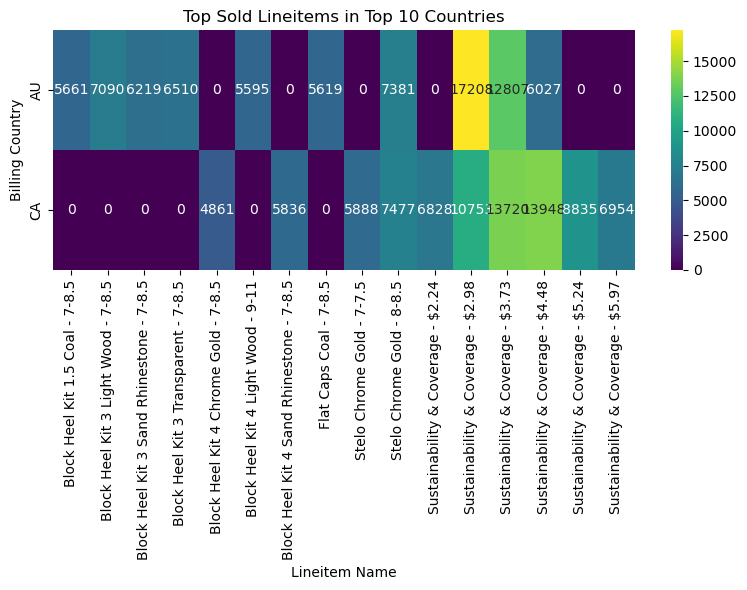

In [40]:
# Generate a heatmap
heatmap_data = top_lineitems_per_country.head(20).pivot(index='Billing_Country', columns='Lineitem_name', values='Total').fillna(0)

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis',fmt=".0f" )
plt.title('Top Sold Lineitems in Top 10 Countries')
plt.ylabel('Billing Country')
plt.xlabel('Lineitem Name')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

With the heatmap, we are trying to find the Top Selling Products in each country. 

Products like Block Heel Kit 1.5 Coal| Size 7-8.5 , Block Heel Kit 3 Light wood|Size 7-8.5 are may be doing fairly well in Australia but not in Canada. Henceforth showcasing the diversity of product preferences over different geographics. 

## Lineitem Breakdown

Deep down analysis done to interpret the Types of Products and Accessories being manufactured and sold. Henceforth  trying to analyse the favorite buying trends, product combinations, favorite colors, sizes etc.

### Categorisation of Lineitem_name Columns
Use of Regular expressions to create Categories with Reference from "Passion Footwear" portal at https://pashionfootwear.com

In [42]:
service_keywords = ["Shipping Protection","Sustainability & Coverage", "Onward VIP Protection"]

gift_cards = ["Gift Card", "E-Gift Card"]
                    
product = ["The Gigi", "The Brenna", "The Slide", "The Sandal", 
           "The D'orsay", "The Pashionista", "The Miranda", "The Adrianna",
           "The Slingback", "The Pump", "The Bootie", "The Boot", "Sale"]

# Existing regex for general combos
regex_combos = r'(?:\+|-\sSize\s[0-9]|-\sFinal\sSale|-\s[0-9]-[0-9]\.5|-\s[0-9]+(?:-[0-9]+)?\.[0-9]+)'

# Specific regex patterns for items categorized under shoes or accessories within combos
regex_shoes = r'(.+?) - (\d+)-(\d+\.\d+)'
regex_accessories_kit = r'(.+?\bkit\b.+) - (\d+)-(\d+\.\d+)'

def categorize_lineitem(name):
    # First, check for services and gift cards
    if any(service_keyword.lower() in name.lower() for service_keyword in service_keywords):
        return 'Services'
    if 'Gift' in name:
        return 'Gift Cards'
    # Next, check for specific combo patterns to classify as shoes or accessories
    elif re.search(regex_accessories_kit, name, re.IGNORECASE):
        return 'Accessories'
    elif re.search(regex_shoes, name, re.IGNORECASE):
        return 'Shoes'
    # Check general combos with existing regex
    elif re.search(regex_combos, name, re.IGNORECASE):
        return 'Combos'
    # Check for general product mentions
    elif any(pr.lower() in name.lower() for pr in product):
        return 'Shoes'
    else:
        return 'Accessories'  # Default category if none of the above

merged_df['Item_type'] = merged_df['Lineitem name'].apply(categorize_lineitem)
print(merged_df[['Lineitem name','Item_type']].head())

# Keep only the specified columns
columns_to_keep = [
    'Name', 'Email', 'Lineitem quantity', 'Lineitem name',
    'Lineitem price', 'Item_type'
]
merged_df = merged_df[columns_to_keep]
print(merged_df.columns)

# Optionally, save the DataFrame to a CSV file
# merged_df.to_csv('aa.csv', index=False)

                                       Lineitem name    Item_type
0                     Onward VIP Protection+ - $8.75     Services
1                          Stelo Chrome Gold - 6-6.5        Shoes
2  The D'Orsay - Forest Velvet + Stiletto Heel Ki...       Combos
3                 Stiletto Heel Kit 4 Whiskey - 9-11  Accessories
4                       Block Heel Kit 4 Coal - 9-11  Accessories
Index(['Name', 'Email', 'Lineitem quantity', 'Lineitem name', 'Lineitem price',
       'Item_type'],
      dtype='object')


In [43]:
# Identify unique lineitem_type values
unique_types = merged_df['Item_type'].unique()
unique_types

array(['Services', 'Shoes', 'Combos', 'Accessories', 'Gift Cards'],
      dtype=object)

In [44]:
# Create a dictionary to hold the DataFrames for each lineitem_type
dfs = {}

for lineitem_type in unique_types:
    # Filter the DataFrame for each unique lineitem_type and store it in the dictionary
    dfs[lineitem_type] = merged_df[merged_df['Item_type'] == lineitem_type]

### Explore the 5 Types (Services, Combo, Accessories, Gift Cards, Shoes)
Aim is to understand and interpret the data in different categories for better understanding and further analysis.

### Study 'Shoes':  
"The Gigi", "The Brenna", "The Slide", "The Sandal", "The D'orsay","The Pashionista", "The Miranda", "The Adrianna", "The Slingback", "The Pump", "The Bootie", "The Boot", "Sale"

In [45]:
dfs['Shoes'].head(5)

,Name,Email,Lineitem quantity,Lineitem name,Lineitem price,Item_type
1,#75662,amomda16@gmail.com,1,Stelo Chrome Gold - 6-6.5,25.00,Shoes
23,#75655,alita8a@gmail.com,1,The Sandal - Latte Leather - 11,145.00,Shoes
41,#75650,emma.jekabson@gmail.com,1,Stelo Forest Green - 10-10.5,15.85,Shoes
46,#75648,erin_hartree@mac.com,1,Stelo - Chrome Silver - 5-5.5,25.66,Shoes
52,#75645,moose.thibodeau@gmail.com,1,Stelo - Chrome Rose Gold - 8-8.5,25.00,Shoes


In [46]:
dfs['Shoes']['Lineitem name'].count()

11039

In [47]:
df_shoes = dfs['Shoes']

In [48]:
def filter_shoe_by_name(df, shoe_name):
    """Filter and return the DataFrame for a specific shoe based on the user's input."""
    return df[df['Lineitem name'].str.contains(shoe_name, case=False)]

# List of shoe names in lowercase for case-insensitive comparison
shoes = ["The Gigi", "The Brenna", "The Slide", "The Sandal", "The D'orsay", "The Pashionista", 
         "The Miranda", "The Adrianna", "The Slingback", "The Pump", "The Bootie", "The Boot", "Sale"]

shoes_lower = [shoe.lower() for shoe in shoes]  # Convert list items to lowercase

# Display available shoes
print("Available shoes:")
for shoe in shoes:
    print(shoe)

# Get user input and convert to lowercase to match the case-insensitive list
user_choice = input("Please enter the shoe name you are interested in: ").strip().lower()

# Check if the user's choice is valid (case-insensitively)
if user_choice in shoes_lower:
    # Find the original casing in the shoes list for display and filtering
    original_shoe_name = shoes[shoes_lower.index(user_choice)]
    # Assuming df_shoes is your DataFrame containing the shoe data
    df_shoes_filtered = filter_shoe_by_name(df_shoes, original_shoe_name)
    print(f"Displaying entries for {original_shoe_name}:")
    print(df_shoes_filtered.head())
else:
    print("Invalid shoe name. Please choose from the list.")


Available shoes:
The Gigi
The Brenna
The Slide
The Sandal
The D'orsay
The Pashionista
The Miranda
The Adrianna
The Slingback
The Pump
The Bootie
The Boot
Sale
Please enter the shoe name you are interested in: the pump
Displaying entries for The Pump:
        Name                        Email  Lineitem quantity  \
184   #75601         caputo23@hotmail.com                  1   
2375  #74785       emilygsoltys@gmail.com                  1   
3134  #74510      travis.shaw70@gmail.com                  1   
4962  #73863    steven.gatewood@gmail.com                  1   
5446  #73671  melanie.jablonski@gmail.com                  1   

                    Lineitem name  Lineitem price Item_type  
184   The Pump - Navy Leather - 7          142.61     Shoes  
2375   The Pump - Latte Knit - 10          140.00     Shoes  
3134     The Pump - Coal Knit - 7          140.00     Shoes  
4962  The Pump - Navy Leather - 9          140.00     Shoes  
5446  The Pump - Navy Leather - 9          140.00     

In [49]:
def visualize_shoe_sales(df_shoe, shoe_name):
    """Create a bar chart visualizing the sales data for the selected shoe."""
    if not df_shoe.empty:
        fig = px.bar(df_shoe,
                     x='Lineitem name', 
                     y='Lineitem quantity',  # Assuming you want to visualize quantities
                     title=f'Total Quantities for {shoe_name}',
                     labels={'Lineitem name': 'Product Variant', 'Lineitem quantity': 'Quantity Sold'},
                     color='Lineitem quantity',  # Color the bars by quantity for additional visual feedback
                     height=400)
        fig.update_layout(xaxis_title='Product Variant',
                          yaxis_title='Quantity Sold',
                          xaxis={'categoryorder':'total descending'})  # Sort bars by quantity sold
        fig.show()
    else:
        print("No data available to visualize for this shoe type.")

# Assuming df_shoes_filtered and original_shoe_name are already defined from the previous step
visualize_shoe_sales(df_shoes_filtered, original_shoe_name)


Out of the all the Variety of Shoes available,as per our choice we can see that the associated quantities being sold and shortlist those being sold the most to manage the inventory in effective manner. 

### Study Accessories: 
Flare Heel Kits, Block Heel Kits, Stiletto Heel Kits, Stelo support, Toe clips, Ankle bows, Flat Caps

In [50]:
dfs['Accessories'].head(5)

,Name,Email,Lineitem quantity,Lineitem name,Lineitem price,Item_type
3,#75661,kmgnadinger@gmail.com,1,Stiletto Heel Kit 4 Whiskey - 9-11,35.0,Accessories
4,#75661,kmgnadinger@gmail.com,1,Block Heel Kit 4 Coal - 9-11,40.0,Accessories
9,#75659,slambertini107@yahoo.com,1,Block Heel Kit 4 Light Wood - 9-11,40.0,Accessories
10,#75659,slambertini107@yahoo.com,1,Block Heel Kit 4 Chrome Gold - 9-11,50.0,Accessories
14,#75656,amandasemrick@gmail.com,1,Block Heel Kit 4 Bone - 7-8.5,40.0,Accessories


In [51]:
dfs['Accessories']['Lineitem name'].count()

32869

In [52]:
df_acc = dfs['Accessories']

In [53]:
def categorize_lineitems(row):
    if 'stiletto heel' in row['Lineitem name'].lower():
        return 'Stiletto Heel Kits'
    elif 'block heel' in row['Lineitem name'].lower():
        return 'Block Heel Kits'
    # Add other categories as needed
    return 'Other'

df_acc['Category'] = df_acc.apply(categorize_lineitems, axis=1)

In [54]:
# Aggregate the 'Lineitem quantity' for each category
category_data = df_acc.groupby('Category')['Lineitem quantity'].sum().reset_index()

# Create a bar chart
fig = px.bar(category_data,
             x='Category',
             y='Lineitem quantity',
             title='Total Lineitem Quantities by Category',
             labels={'Lineitem quantity': 'Total Quantity', 'Category': 'Category'},
             color='Category')  # Coloring bars by category for better visual distinction

fig.show()

Heel Kits are top favorites but 'Block heel kits' are utmost favorite accessories over rest. 

### Study Services: Onward VIP Protection, Sustainability & Coverage, Green Shipping Protection

In [55]:
dfs['Services'].head(5)

,Name,Email,Lineitem quantity,Lineitem name,Lineitem price,Item_type
0,#75662,amomda16@gmail.com,1,Onward VIP Protection+ - $8.75,8.75,Services
8,#75659,slambertini107@yahoo.com,1,Onward VIP Protection+ - $3.75,3.75,Services
11,#75658,rainbowgirl231@gmail.com,1,Onward VIP Protection+ - $8.35,8.35,Services
22,#75655,alita8a@gmail.com,1,Onward VIP Protection+ - $7.95,7.95,Services
25,#75654,andrew8073@gmail.com,1,Onward VIP Protection+ - $7.55,7.55,Services


In [56]:
dfs['Services']['Lineitem name'].count()

17963

In [57]:
df_svs = dfs['Services']

In [58]:
def categorize_services(row):
    lineitem = row['Lineitem name'].lower()
    
    if 'onward' in lineitem and 'vip' in lineitem and 'protection' in lineitem:
        return 'Onward VIP Protection'
    elif 'sustainability' in lineitem or 'coverage' in lineitem:
        return 'Sustainability & Coverage'
    elif 'shipping' in lineitem and 'protection' in lineitem:
        return 'Shipping Protection'
    else:
        return 'Other'

# Assume df_svs is already defined and contains the relevant 'Lineitem name' column
df_svs['Category'] = df_svs.apply(categorize_services, axis=1)
print(df_svs['Category'].value_counts())


Sustainability & Coverage    8728
Shipping Protection          6168
Onward VIP Protection        3067
Name: Category, dtype: int64


In [59]:
# Aggregate data by category
category_summary = df_svs.groupby('Category')['Lineitem quantity'].sum().reset_index()

# Create a bar chart
fig = px.bar(category_summary,
             x='Category',
             y='Lineitem quantity',
             title='Total Quantities by Service Category',
             labels={'Quantity': 'Total Quantity', 'Category': 'Service Category'},
             color='Category')

fig.show()


'Sustainability & Coverage' is being most frequently availed amongst all form of services offered by the business.

### Study  Gift Cards:

In [60]:
dfs['Gift Cards'].head(5)

,Name,Email,Lineitem quantity,Lineitem name,Lineitem price,Item_type
494,#75482,paularueda077@gmail.com,1,Pashion Footwear E-Gift Card - 40,40.6,Gift Cards
1184,#75228,brendafaires128@gmail.com,1,Pashion Footwear E-Gift Card - 50,50.0,Gift Cards
1186,#75226,alli83@yahoo.com,1,Pashion Footwear E-Gift Card - 100,100.0,Gift Cards
1235,#75210,lilian.rokosz@gmail.com,1,Pashion Footwear E-Gift Card - 35,35.0,Gift Cards
1375,#75172,asac2015@hotmail.com,1,Pashion Footwear E-Gift Card - 150,150.0,Gift Cards


In [61]:
dfs['Gift Cards']['Lineitem name'].count()

388

In [62]:
df_gc = dfs['Gift Cards']

In [63]:
def categorize_gift_cards(row):
    lineitem = row['Lineitem name'].lower()
    
    if 'e-gift card' in lineitem:
        return 'E-Gift Card'
    elif 'gift card' in lineitem:
        return 'Gift Card'
    else:
        return 'Other'


df_gc['Category'] = df_gc.apply(categorize_gift_cards, axis=1)
print(df_gc['Category'].value_counts())

E-Gift Card    251
Gift Card      137
Name: Category, dtype: int64


In [64]:
# Count occurrences in the dataset 

category_summary = df_gc.groupby('Category').size().reset_index(name='Counts')

# Then plot with 'Counts' instead of 'Quantity'
fig = px.bar(category_summary,
             x='Category',
             y='Counts',
             title='Count of Gift Card Types',
             labels={'Counts': 'Number of Entries', 'Category': 'Gift Card Type'},
             color='Category')

fig.show()


Graph shows the prevailence of E-gift cards over usual ones,Might help the business to invest more on medium of e-gift cards. 

### Study Combos: 
Combo is when an order consists of : Product and Accessory bough together.

In [65]:
dfs['Combos'].head(5)

,Name,Email,Lineitem quantity,Lineitem name,Lineitem price,Item_type
2,#75662,amomda16@gmail.com,1,The D'Orsay - Forest Velvet + Stiletto Heel Ki...,190.0,Combos
5,#75661,kmgnadinger@gmail.com,1,The Pashionista - Coal Leather + Stiletto Heel...,190.0,Combos
6,#75661,kmgnadinger@gmail.com,1,The Pashionista - Whiskey Leather + Block Heel...,190.0,Combos
7,#75660,jwheaton713@gmail.com,1,The Bootie - Coal Knit + Block Heel Kit 4 Coal...,225.0,Combos
12,#75658,rainbowgirl231@gmail.com,1,The Pashionista - Sand Patent Rhinestone + Blo...,205.0,Combos


In [66]:
dfs['Combos']['Lineitem name'].count()

45032

In [67]:
df_combo = dfs['Combos']

In [68]:
# Define a regex pattern to capture the Lineitem, Color, Accessories, and Size
pattern = r'(.*) - (.+?) \+ (.+?) - (\d+\.\d+|\d+)'

df_combo[['Lineitem', 'Color', 'Accessories', 'Size']] = df_combo['Lineitem name'].str.extract(pattern)

df_combo.head()

,Name,Email,Lineitem quantity,Lineitem name,Lineitem price,Item_type,Lineitem,Color,Accessories,Size
2,#75662,amomda16@gmail.com,1,The D'Orsay - Forest Velvet + Stiletto Heel Ki...,190.0,Combos,The D'Orsay,Forest Velvet,Stiletto Heel Kit 3 Forest Green,6.5
5,#75661,kmgnadinger@gmail.com,1,The Pashionista - Coal Leather + Stiletto Heel...,190.0,Combos,The Pashionista,Coal Leather,Stiletto Heel Kit 3 Coal,9
6,#75661,kmgnadinger@gmail.com,1,The Pashionista - Whiskey Leather + Block Heel...,190.0,Combos,The Pashionista,Whiskey Leather,Block Heel Kit 4 Whiskey,9
7,#75660,jwheaton713@gmail.com,1,The Bootie - Coal Knit + Block Heel Kit 4 Coal...,225.0,Combos,The Bootie,Coal Knit,Block Heel Kit 4 Coal,7.5
12,#75658,rainbowgirl231@gmail.com,1,The Pashionista - Sand Patent Rhinestone + Blo...,205.0,Combos,The Pashionista,Sand Patent Rhinestone,Block Heel Kit 3 Sand Rhinestone,10


In [69]:
df_combo.info()
# df_combo.to_csv('try.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45032 entries, 2 to 107290
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               45032 non-null  object 
 1   Email              44835 non-null  object 
 2   Lineitem quantity  45032 non-null  int64  
 3   Lineitem name      45032 non-null  object 
 4   Lineitem price     45032 non-null  float64
 5   Item_type          45032 non-null  object 
 6   Lineitem           36863 non-null  object 
 7   Color              36863 non-null  object 
 8   Accessories        36863 non-null  object 
 9   Size               36863 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.8+ MB


### Top Product- Product Combinations

In [102]:
# Clean the data: Convert all line items to strings and handle NaNs
df_combo['Lineitem'] = df_combo['Lineitem'].astype(str).fillna('Unknown')

# Grouping the data by Order_Id and collecting Lineitems in each order
orders_lineitems = df_combo.groupby('Name')['Lineitem'].apply(list)

# Initialize a counter for lineitem pairs
lineitem_pairs = Counter()

for lineitems in orders_lineitems:
    # Ensure all items in lineitems are strings to avoid the TypeError
    lineitems_str = [str(item) for item in lineitems]
    for pair in combinations(set(lineitems_str), 3):
        sorted_pair = tuple(sorted(pair))
        lineitem_pairs[sorted_pair] += 1

# Convert the lineitem pairs counter to a DataFrame for easier analysis
lineitem_pairs_df = pd.DataFrame(lineitem_pairs.items(), columns=['Lineitem Pair', 'Frequency'])

# Split 'Lineitem Pair' into three separate columns
lineitem_pairs_df[['Product1', 'Product2', 'Product3']] = pd.DataFrame(lineitem_pairs_df['Lineitem Pair'].tolist(), index=lineitem_pairs_df.index)

# Drop the original 'Lineitem Pair' column
lineitem_pairs_df.drop(columns=['Lineitem Pair'], inplace=True)

# Sort the DataFrame by 'Frequency' to get the top combinations
lineitem_pairs_df = lineitem_pairs_df.sort_values('Frequency', ascending=False)

# Display the modified DataFrame (top 10)
print(lineitem_pairs_df.head(10))

     Frequency         Product1         Product2    Product3
3           20      The D'Orsay  The Pashionista  The Sandal
1           17  The Pashionista         The Pump  The Sandal
0           15      The D'Orsay  The Pashionista    The Pump
8           15       The Bootie  The Pashionista  The Sandal
133         15       The Sandal        The Slide         nan
21          14       The Bootie       The Sandal         nan
24          14      The Miranda  The Pashionista  The Sandal
47          14     The Adrianna       The Sandal   The Slide
4           14       The Bootie      The D'Orsay  The Sandal
62          13     The Adrianna        The Slide         nan


In [72]:
# Create a new column 'Combination' for plotting
lineitem_pairs_df['Combination'] = lineitem_pairs_df[['Product1', 'Product2', 'Product3']].agg(' | '.join, axis=1)

# Use Plotly to create a bar chart
fig = px.bar(lineitem_pairs_df.head(10), x='Combination', y='Frequency', title='Top Product Combinations', labels={'Frequency': 'Frequency of Combination'})
fig.update_layout(xaxis_title="Product Combination", yaxis_title="Frequency")
fig.show()

Product combination:'The Pashionista| The Sandal' are most frequently purchased by customers

### Top Product- Accessories Combination

In [73]:
# Generate the (lineitem, accessory) pairs and count their frequencies
item_accessory_pairs = Counter(zip(df_combo['Lineitem'], df_combo['Accessories']))

# Initialize an empty list to hold the lineitem, accessory, and frequency
item_accessory_pairs_list = []

for (lineitem, accessory), frequency in item_accessory_pairs.items():
    item_accessory_pairs_list.append({'Lineitem': lineitem, 'Accessories': accessory, 'Frequency': frequency})

# Convert the list of dictionaries to a DataFrame
item_accessory_pairs_df = pd.DataFrame(item_accessory_pairs_list)

# Display the top 10 most common 'Lineitem'-'Accessory' pairs
top_item_accessory_pairs = item_accessory_pairs_df.sort_values('Frequency', ascending=False).head(10)
print(top_item_accessory_pairs.head(20))

# top_item_accessory_pairs.to_csv('check.csv')

            Lineitem             Accessories  Frequency
5                nan                     NaN       8169
78   The Pashionista  Block Heel Kit 3 White        751
88        The Sandal   Block Heel Kit 3 Sand        688
24        The Sandal   Block Heel Kit 4 Sand        663
125       The Sandal  Block Heel Kit 4 Latte        612
79   The Pashionista  Block Heel Kit 4 White        588
65        The Sandal   Block Heel Kit 4 Coal        588
44   The Pashionista   Block Heel Kit 4 Coal        581
16        The Sandal  Block Heel Kit 3 Latte        566
41   The Pashionista   Block Heel Kit 4 Sand        517


In [74]:
# Initialize the figure
fig = go.Figure()

# Add a trace for each unique line item, but only make the first one visible
unique_lineitems = item_accessory_pairs_df['Lineitem'].unique()
for lineitem in unique_lineitems:
    filtered_df = item_accessory_pairs_df[item_accessory_pairs_df['Lineitem'] == lineitem]

    fig.add_trace(go.Bar(x=filtered_df['Accessories'],
                         y=filtered_df['Frequency'],
                         name=lineitem,
                         visible=(lineitem == unique_lineitems[0])))

# Create a dropdown menu with an option for each line item
dropdown_buttons = [
    {'label': lineitem,
     'method': "update",
     'args': [{'visible': [lineitem == val for val in unique_lineitems]},
              {'title': f"Frequency of Accessories for {lineitem}"}]}
    for lineitem in unique_lineitems
]

# Update the layout to include the dropdown
fig.update_layout(
    updatemenus=[
        {'active': 0,
         'buttons': dropdown_buttons,
         'x': 0.15,
         'xanchor': 'left',
         'y': 1.15,
         'yanchor': 'top'}
    ],
    title_text=f"Frequency of Accessories for {unique_lineitems[0]}"
)

# Show the figure
fig.show()


For the selected 'product' all the accessories sold are shown, that helps to structure the inventory for relevant accessories. Also, it can be used to send recommendations to the customers during purchases. 

### Color Pattern for each Lineitem 

In [75]:
# Aggregate data to calculate frequency of each color for every lineitem
color_frequency = df_combo.groupby(['Lineitem', 'Color']).size().reset_index(name='Frequency')

# Sort the results to make sure the most frequent colors are listed first for each lineitem
color_frequency_sorted = color_frequency.sort_values(['Lineitem', 'Frequency'], ascending=[True, False])


# Creating a list of unique colors present in the dataset
unique_colors = df_combo['Color'].unique().tolist()

# Display the list of unique colors
#unique_colors

In [76]:
#TOP 5 COLORS/LINEITEM 
# Aggregate data to calculate frequency of each color for every lineitem
color_frequency = df_combo.groupby(['Lineitem', 'Color']).size().reset_index(name='Frequency')

# Sort the results to make sure the most frequent colors are listed first for each lineitem
color_frequency_sorted = color_frequency.sort_values(['Lineitem', 'Frequency'], ascending=[True, False])

# Visualize the top N colors for each lineitem
top_n_colors = 5
top_colors_per_lineitem = color_frequency_sorted.groupby('Lineitem').head(top_n_colors)

color_map = {
    'Forest Velvet': '#228B22',  # Forest Green
    'Coal Leather': '#333333',  # Dark grey, close to black
    'Whiskey Leather': '#d29062',  # A warm, medium brown
    'Coal Knit': '#363636',  # Dark grey, slightly lighter than Coal
    'Sand Patent Rhinestone': '#c2b280',  # Light brown, approximation
    'Butter': '#fffacd',  # Light creamy yellow
    'Whiskey Knit': '#d29062',  # Similar to Whiskey Leather
    'White Leather': '#ffffff',
    'Taupe Blush Leather Stud': '#b38b6d',  # Taupe with pinkish hue
    'Coal Leather Stud': '#333333',  # Same as Coal Leather
    'Taupe Blush': '#b38b6d',  # Similar to Taupe Blush Leather Stud
    'Storm': '#71797E',  # Grey with a hint of blue
    'White Satin Lace': '#fffff0',  # Ivory, close to White Satin
    'Storm Suede': '#4F4F4F',  # Greyish-black
    'Sand Braid': '#c2b280',  # Similar to Sand Patent
    'Sand Leather': '#f1c27d',  # Light brown-yellow
    'Storm Knit': '#b0e0e6',  # Powder blue, as requested
    'Whiskey': '#d29062',  # Same as Whiskey Leather
    'Coal': '#333333',  # Coal black
    'Latte Leather': '#c5a883',  # Similar to Latte
    'Sand Raffia': '#c2b280',  # Similar to Sand Braid
    'Walnut': '#773f1a',  # Dark brown
    'Latte': '#c5a883',
    'Walnut Patent': '#773f1a',  # Similar to Walnut
    'Orchid Braid': '#da70d6',  # Similar to Orchid
    'Sand Knit': '#8b4513',  # Brownish, as requested
    'Whiskey Braid': '#d29062',  # Similar to Whiskey
    'Sand': '#f4a460',  # Sandy brown
    'Latte Knit': '#c5a883',  # Same as Latte, with knit pattern implied
    'Coal Patent Bow': '#333333',  # Same as Coal, with a patent finish
    'White Satin': '#fffff0',  # Ivory, close to White Satin Lace
    'Latte Patent': '#c5a883',  # Patent finish of Latte
    'Navy Leather': '#000080',  # Navy blue
    'Clear/Sand ': '#f4a460',  # Sandy brown, clear implied in product type
    'White Crystal Bow': '#ffffff',  # White with crystal implied
    'White Satin Pearl': '#fffff0',  # Ivory, close to White Satin
    'Sand Transparent Rhinestone': '#c2b280',  # Light brown, transparent implied
    'Coal Braid': '#333333',  # Same as Coal
    'Sand Patent': '#f4a460',  # Light brown-yellow, as requested
    'White': '#ffffff',
    'Coal Canvas': '#333333',  # Same as Coal
    'Mango Leather': '#FFC107',  # Bright yellow-orange
    'Latte Braid': '#c5a883',  # Same as Latte
    'Lavender Braid': '#e6e6fa',  # Light purple, similar to Lavender
    'Mango Canvas': '#FFC107',  # Same as Mango Leather
    'Cocoa Patent': '#d2691e',  # Chocolate brown, patent implied
    'Sand Patent Bow': '#f4a460',  # Sandy brown, patent finish
    'Lavender': '#e6e6fa',
    'White Satin Bow': '#fffff0',  # Ivory, satin bow implied
    'Ivory Satin Bow': '#fffff0',  # Ivory, similar to White Satin Bow
    'Orchid': '#da70d6',
    'Mango Elastic': '#FFC107',  # Bright yellow-orange
    'White Canvas': '#ffffff',  # White, canvas texture implied
    'Burgundy Velvet': '#800020',  # Deep red
    'Blue Denim Daisy': '#1f75fe',  # Bright blue, denim implied
    'Matte Gold': '#d4af37',  # Gold, matte finish
    'Coal Patent Coal Rhinestone': '#333333',  # Coal, patent with rhinestone
    'Taupe Blush Suede': '#b38b6d',  # Taupe Blush, suede finish
    'Coal Crystal': '#333333',  # Coal, crystal finish implied
    'Metallic Gold': '#d4af37'  # Bright gold, metallic finish
}

fig_all_colors_revised = px.bar(top_colors_per_lineitem,
                                x='Lineitem',
                                y='Frequency',
                                color='Color',
                                title='Colors for Each Lineitem',
                                labels={'Frequency': 'Frequency of Color'},
                                color_discrete_map=color_map,  # Use the revised color map
                                category_orders={"Lineitem": top_colors_per_lineitem['Lineitem'].unique()})

fig_all_colors_revised.update_layout(xaxis={'categoryorder':'total descending'})
# Displaying the figure is expected to fail due to the connection issue, but this code can be run locally.
fig_all_colors_revised

There are two forms of interpretations that exist here: 
1. Top 5 Favorite Colors in each Product/Lineitem.
2. Product/Lineitem available in specific colors. 

### Size Pattern for each Lineitem

In [77]:
# Aggregate data to calculate frequency of each size for every lineitem
size_frequency = df_combo.groupby(['Lineitem', 'Size']).size().reset_index(name='Frequency')

# Sort the results to make sure the most frequent sizes are listed first for each lineitem
size_frequency_sorted = size_frequency.sort_values(['Lineitem', 'Frequency'], ascending=[True, False])

# Visualize the top N sizes for each lineitem
top_n_sizes = 5
top_sizes_per_lineitem = size_frequency_sorted.groupby('Lineitem').head(top_n_sizes)

fig = px.bar(top_sizes_per_lineitem,
             x='Lineitem',
             y='Frequency',
             color='Size',
             title='Most Popular Sizes for Each Lineitem',
             labels={'Frequency': 'Frequency of Size'},
             category_orders={"Lineitem": size_frequency_sorted['Lineitem'].unique()})  # Ensure lineitems are ordered consistently

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

Most common size in almost all Lineitems is : size 8 and 8.5

## Shopping Pattern

To understand the buying pattern of customers during [Oct,23 to Jan,24], since the orders splurged over this period and it may be crucial for business to understand the customer's behavior during this phase. 

**Since this analysis is for selective period only- it may be only INDICATIVE of the real patterns in the whole data** 

In [78]:
merged_df= pd.read_csv("merged_data_o.csv")

#### Categorisation of Lineitem_name Columns

In [79]:
service_keywords = ["Shipping Protection","Sustainability & Coverage", "Onward VIP Protection"]

gift_cards = ["Gift Card", "E-Gift Card"]
                    
product = ["The Gigi", "The Brenna", "The Slide", "The Sandal", 
           "The D'orsay", "The Pashionista", "The Miranda", "The Adrianna",
           "The Slingback", "The Pump", "The Bootie", "The Boot", "Sale"]

# Existing regex for general combos
regex_combos = r'(?:\+|-\sSize\s[0-9]|-\sFinal\sSale|-\s[0-9]-[0-9]\.5|-\s[0-9]+(?:-[0-9]+)?\.[0-9]+)'

# Specific regex patterns for items categorized under shoes or accessories within combos
regex_shoes = r'(.+?) - (\d+)-(\d+\.\d+)'
regex_accessories_kit = r'(.+?\bkit\b.+) - (\d+)-(\d+\.\d+)'

def categorize_lineitem(name):
    # First, check for services and gift cards
    if any(service_keyword.lower() in name.lower() for service_keyword in service_keywords):
        return 'Services'
    if 'Gift' in name:
        return 'Gift Cards'
    # Next, check for specific combo patterns to classify as shoes or accessories
    elif re.search(regex_accessories_kit, name, re.IGNORECASE):
        return 'Accessories'
    elif re.search(regex_shoes, name, re.IGNORECASE):
        return 'Shoes'
    # Check general combos with existing regex
    elif re.search(regex_combos, name, re.IGNORECASE):
        return 'Combos'
    # Check for general product mentions
    elif any(pr.lower() in name.lower() for pr in product):
        return 'Shoes'
    else:
        return 'Accessories'  # Default category if none of the above

# Example application (assuming merged_df is already defined)
merged_df['Item_type'] = merged_df['Lineitem name'].apply(categorize_lineitem)
# print(merged_df[['Lineitem name','Item_type']].head())

merged_df.columns

# Optionally, save the DataFrame to a CSV file
# merged_df.to_csv('aa.csv', index=False)

Index(['Name', 'Email', 'Financial Status', 'Paid at', 'Fulfillment Status',
       'Fulfilled at', 'Accepts Marketing', 'Currency', 'Subtotal', 'Shipping',
       'Taxes', 'Total', 'Discount Code', 'Discount Amount', 'Shipping Method',
       'Created at', 'Lineitem quantity', 'Lineitem name', 'Lineitem price',
       'Lineitem compare at price', 'Lineitem sku',
       'Lineitem requires shipping', 'Lineitem taxable',
       'Lineitem fulfillment status', 'Billing Name', 'Billing Street',
       'Billing Address1', 'Billing Address2', 'Billing Company',
       'Billing City', 'Billing Zip', 'Billing Province', 'Billing Country',
       'Billing Phone', 'Shipping Name', 'Shipping Street',
       'Shipping Address1', 'Shipping Address2', 'Shipping Company',
       'Shipping City', 'Shipping Zip', 'Shipping Province',
       'Shipping Country', 'Shipping Phone', 'Notes', 'Note Attributes',
       'Cancelled at', 'Payment Method', 'Payment Reference',
       'Refunded Amount', 'Vendor', '

In [80]:
# Convert the specified columns to datetime format
datetime_columns = ['Paid at', 'Fulfilled at', 'Created at', 'Cancelled at']

for col in datetime_columns:
    merged_df[col] = pd.to_datetime(merged_df[col], format='%Y-%m-%d %H:%M:%S', errors='coerce', utc=True)

# Verify the datatype conversion by printing the dtypes of these columns
converted_dtypes = merged_df[datetime_columns].dtypes
print(converted_dtypes)

Paid at         datetime64[ns, UTC]
Fulfilled at    datetime64[ns, UTC]
Created at      datetime64[ns, UTC]
Cancelled at    datetime64[ns, UTC]
dtype: object


#### Filter Time: Last Quarter (Oct,23 to Dec,23)

In [81]:
# Convert 'Paid_at' to datetime in UTC, then to PST
merged_df['Paid at'] = pd.to_datetime(merged_df['Paid at'], format='%Y-%m-%d %H:%M:%S', errors='coerce', utc=True)
merged_df['Paid at'] = merged_df['Paid at'].dt.tz_convert('America/Los_Angeles')

# Define the start and end date directly
start_date = pd.Timestamp(year=2023, month=10, day=1, tz='America/Los_Angeles')
end_date = pd.Timestamp(year=2024, month=1, day=31, tz='America/Los_Angeles')

# Filter the DataFrame for records from October 2023 to January 2024
filtered_df = merged_df[(merged_df['Paid at'] >= start_date) & (merged_df['Paid at'] <= end_date)]

filtered_df['Paid at'].describe()

count                          8018
unique                         8009
top       2023-12-12 11:53:20-08:00
freq                              2
first     2023-10-01 00:30:32-07:00
last      2024-01-26 16:34:01-08:00
Name: Paid at, dtype: object

In [82]:
filtered_df.columns

Index(['Name', 'Email', 'Financial Status', 'Paid at', 'Fulfillment Status',
       'Fulfilled at', 'Accepts Marketing', 'Currency', 'Subtotal', 'Shipping',
       'Taxes', 'Total', 'Discount Code', 'Discount Amount', 'Shipping Method',
       'Created at', 'Lineitem quantity', 'Lineitem name', 'Lineitem price',
       'Lineitem compare at price', 'Lineitem sku',
       'Lineitem requires shipping', 'Lineitem taxable',
       'Lineitem fulfillment status', 'Billing Name', 'Billing Street',
       'Billing Address1', 'Billing Address2', 'Billing Company',
       'Billing City', 'Billing Zip', 'Billing Province', 'Billing Country',
       'Billing Phone', 'Shipping Name', 'Shipping Street',
       'Shipping Address1', 'Shipping Address2', 'Shipping Company',
       'Shipping City', 'Shipping Zip', 'Shipping Province',
       'Shipping Country', 'Shipping Phone', 'Notes', 'Note Attributes',
       'Cancelled at', 'Payment Method', 'Payment Reference',
       'Refunded Amount', 'Vendor', '

In [83]:
# Removing the unwanted columns
columns_to_keep = [
    'Name','Email','Paid at','Lineitem quantity', 'Lineitem name',
    'Lineitem price', 'Lineitem compare at price', 'Lineitem sku',
    'Lineitem requires shipping', 'Lineitem taxable',
    'Lineitem fulfillment status','Item_type'
]

# Keep only the specified columns
df_filtered = filtered_df[columns_to_keep]
df_filtered.columns

Index(['Name', 'Email', 'Paid at', 'Lineitem quantity', 'Lineitem name',
       'Lineitem price', 'Lineitem compare at price', 'Lineitem sku',
       'Lineitem requires shipping', 'Lineitem taxable',
       'Lineitem fulfillment status', 'Item_type'],
      dtype='object')

In [84]:
# Exclude rows where 'Ctype' is 'Services'
df_no_services = df_filtered[df_filtered['Item_type'] != 'Services']

# Sort the DataFrame by 'Email' and 'Paid at'
df_sorted = df_no_services.sort_values(by=['Email', 'Paid at'])

# Group by 'Email' and aggregate 'Ctype' in the sorted order
customer_patterns = df_sorted.groupby('Email')['Item_type'].agg(lambda x: ' -> '.join(x)).reset_index()

# Count how many times each pattern occurs
pattern_counts = customer_patterns['Item_type'].value_counts()

# Display the top 20 patterns
top_20_patterns = pattern_counts.head(20)
top_20_patterns

Combos                                       1394
Accessories                                   875
Shoes                                         253
Gift Cards                                     94
Combos -> Accessories                          69
Accessories -> Accessories                     68
Combos -> Combos                               68
Accessories -> Combos                          45
Shoes -> Accessories                           23
Combos -> Shoes                                16
Accessories -> Accessories -> Accessories      14
Accessories -> Shoes                           13
Shoes -> Combos                                10
Accessories -> Combos -> Accessories            9
Accessories -> Accessories -> Combos            8
Shoes -> Shoes                                  6
Accessories -> Shoes -> Accessories             5
Combos -> Accessories -> Accessories            5
Accessories -> Combos -> Combos                 4
Gift Cards -> Accessories                       4


In [85]:
# Convert pattern_counts Series to DataFrame for Plotly
pattern_counts_df = pattern_counts.head(10).reset_index()
pattern_counts_df.columns = ['Pattern', 'Count']

# Plotting the top 20 patterns
fig = px.bar(pattern_counts_df, x='Pattern', y='Count', title='Top 10 Customer Purchase Patterns')
fig.update_layout(xaxis_title='Purchase Pattern', yaxis_title='Frequency', xaxis={'categoryorder':'total descending'})
fig.show()

Only to visualise top 10 trends: There are exclusive Shoes only and Accessories only buyers but most customers have bought 'combos' ie. Product with Accessories. There are quite few too who progress from one category to another. 

Other patterns also do exist which may be seen in the visualisations below.

In [103]:
# Assume top_20_patterns is a Series with patterns as the index and counts as values
top_20_patterns = pattern_counts.head(20)

# Create lists for Sankey diagram source, target, and value
sources = []
targets = []
values = []
labels = []

# Assign an index to each unique item across all patterns
item_to_id = {}
for pattern, count in top_20_patterns.items():
    items = pattern.split(' -> ')
    for item in items:
        if item not in item_to_id:
            item_to_id[item] = len(labels)
            labels.append(item)

    for i in range(len(items) - 1):
        sources.append(item_to_id[items[i]])
        targets.append(item_to_id[items[i+1]])
        values.append(count)

# Create the Sankey diagram data
sankey_data = Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
)

# Create the figure
fig = go.Figure(data=[sankey_data])

# Update layout
fig.update_layout(
    title_text='Top 20 Customer Purchase Patterns',
    font_size=10
)

# Show the figure
fig.show()


This Sankey diagram supports the transition of buyers from one category to another and even the repetitive buyers of same product type.

In [87]:
# Create a DataFrame for the tree map
data = [{'name': pattern, 'value': count} for pattern, count in pattern_counts.items()]

# Create the tree map
fig = px.treemap(data, path=['name'], values='value', title='Tree Map of Customer Purchase Patterns')
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()


For this tree map in addition to major categories, we can clearly see the other 'not so frequent' patterns too [Accessory- combo-accessory-shoes-accessory-accessory-accessory] and many more. This indicates the diversity in buying patterns

### Frequency of transitions:  from one item type to another based on the purchase patterns

In [88]:
# Get a list of all unique item types in the patterns
all_item_types = set(" -> ".join(customer_patterns['Item_type']).split(" -> "))

# Initialize a transition matrix with zeros
transition_matrix = pd.DataFrame(np.zeros((len(all_item_types), len(all_item_types))), index=all_item_types, columns=all_item_types)

# Fill the transition matrix with counts
for pattern in customer_patterns['Item_type']:
    items = pattern.split(" -> ")
    for i in range(len(items) - 1):
        transition_matrix.loc[items[i], items[i + 1]] += 1

#Normalize the rows to sum to 1 if we want probabilities instead of counts
#transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

transition_matrix

,Combos,Gift Cards,Shoes,Accessories
Combos,127.0,5.0,43.0,143.0
Gift Cards,4.0,4.0,2.0,10.0
Shoes,28.0,6.0,13.0,60.0
Accessories,122.0,9.0,41.0,179.0


Matrix here justifies the transitions made from one category to another. 

There were 28 'Shoes' buyers who expanded their purchase to 'Combos' , 6 expanded to 'Gift Cards', 13 kept buying Shoes over again, and 60 who expanded to buying 'Accessories' later. 

## Temporal Purchase Patterns
when customers tend to make purchases to see if there's a pattern based on time, such as specific months, days of the week

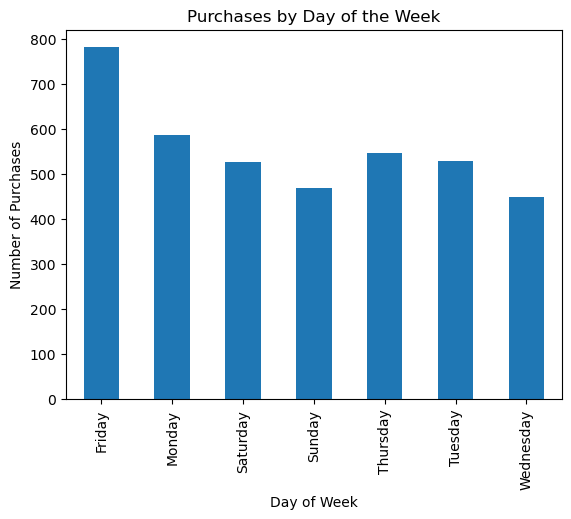

In [89]:
# Convert 'Paid_at' to datetime if not already done
df_sorted['Paid at'] = pd.to_datetime(df_sorted['Paid at'])

# Extract day of week, month, and hour for further analysis
df_sorted['day_of_week'] = df_sorted['Paid at'].dt.day_name()
df_sorted['month'] = df_sorted['Paid at'].dt.month_name()
df_sorted['hour'] = df_sorted['Paid at'].dt.hour

# Analyze purchases by day of the week
weekday_counts = df_sorted['day_of_week'].value_counts().sort_index()

# Plot purchases by day of the week
weekday_counts.plot(kind='bar')
plt.title('Purchases by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Purchases')
plt.show()

**"Fridays are favorites" for Purchases.**
Would help Business to plan Launch of new products and marketing campaigns. 

In [90]:
df_sorted.columns

Index(['Name', 'Email', 'Paid at', 'Lineitem quantity', 'Lineitem name',
       'Lineitem price', 'Lineitem compare at price', 'Lineitem sku',
       'Lineitem requires shipping', 'Lineitem taxable',
       'Lineitem fulfillment status', 'Item_type', 'day_of_week', 'month',
       'hour'],
      dtype='object')

## Top Product in each Item_type

In [91]:
popularity_by_itype = df_sorted.groupby(['Item_type', 'Lineitem name']).size().reset_index(name='count')
most_popular_by_itype = popularity_by_itype.sort_values(['Item_type', 'count'], ascending=[True, False]).groupby('Item_type').head(1)

most_popular_by_itype

,Item_type,Lineitem name,count
50,Accessories,Block Heel Kit 3 Coal - 7-8.5,30
365,Combos,The Bootie - Coal Knit + Block Heel Kit 3 Coal...,11
1491,Gift Cards,Pashion Footwear E-Gift Card - 100,27
1537,Shoes,Stelo Chrome Gold - 7-7.5,37


Best lineitem in each category is shown, indicative of top-favorite in each category.

## Lineitem Combinations - purchased by Customers

In [92]:
# Filter out transactions with a single item
multi_item_orders = df_sorted[df_sorted.duplicated('Email', keep=False)]

# Group by order and list items
item_combinations = multi_item_orders.groupby('Email')['Lineitem name'].apply(list)

# Generate all item pairs within each order and count occurrences
pair_counts = Counter()
for items in item_combinations:
    for pair in combinations(items, 3):
        pair_counts[pair] += 1

most_common_pairs = pair_counts.most_common(3)
most_common_pairs

[(('The Pashionista - Sand Leather + Block Heel Kit 3 Sand - 9.5',
   '3 Inch Block Heel Kit Espadrille - 9-11',
   'The Brenna - White Leather + Block Heel Kit 3 White - 9.5'),
  2),
 (('The Pashionista - Sand Leather + Block Heel Kit 3 Sand - 9.5',
   'The Brenna - White Leather + Block Heel Kit 3 White - 9.5',
   'Stelo - Chrome Rose Gold - 9-9.5'),
  2),
 (('The Pashionista - Sand Leather + Block Heel Kit 3 Sand - 9.5',
   'The Brenna - White Leather + Block Heel Kit 3 White - 9.5',
   'Pashion Footwear E-Gift Card - 200'),
  2)]

For customers making repetitive purchases,lineitem combinations are grouped to extract the most common purchases being done. 

## Customer_Profiling
Based on their Shopping pattern/buying behaviour, customers are segmented into following named categories. 

In [93]:
def categorize_profile(pattern):
    pattern = pattern.lower() 
    if 'gift cards' in pattern:
        return 'Gift Card Buyers'
    elif 'shoes' in pattern and 'combos' not in pattern:
        return 'Niche Enthusiasts'
    elif 'shoes' in pattern and 'combos' in pattern:
        return 'Value Seekers'
    elif 'accessories' in pattern and 'combos' not in pattern:
        return 'Accessories Fans'
    elif ('accessories' in pattern and 'combos' in pattern) or ('combos' in pattern and 'accessories' in pattern):
        return 'Adventure Shoppers'
    elif 'combos' in pattern:
        return 'Combo Seekers'
    else:
        return 'Frequent Switchers'

customer_patterns['Profile'] = customer_patterns['Item_type'].apply(categorize_profile)
profile_counts = customer_patterns['Profile'].value_counts()

In [94]:
fig = px.bar(profile_counts, x=profile_counts.index, y=profile_counts.values,
             title='Customer Profile Distribution', labels={'index': 'Customer Profile', 'value': 'Frequency'})
fig.update_layout(xaxis_title='Customer Profile', yaxis_title='Frequency')
fig.show()

Value Seekers(i.e, those buying Shoes and combos) are less in number, but they do exist. There are still customers out there who would buy Shoes and would not leave opportunity for combo-buys too!

## Clustering customers
Machine Learning Algorithm applied to cluster based on the categories mentioned.

### Customer Profile (KModes Clustering)

In [95]:
# Create dummy variables from the 'Profile' column
c_dummies = pd.get_dummies(customer_patterns[['Profile']])

# Initialize and fit the K-modes model
km = KModes(n_clusters=5, init='Huang', n_init=10, verbose=1)
clusters = km.fit_predict(c_dummies)

# Attach cluster labels back to the DataFrame
customer_patterns['Cluster'] = clusters

# Map cluster IDs to the profile names most frequent in each cluster
cluster_names = {i: customer_patterns.loc[customer_patterns['Cluster'] == i, 'Profile'].mode()[0] for i in range(km.n_clusters)}

# Replace numeric cluster IDs with descriptive names
customer_patterns['Cluster'] = customer_patterns['Cluster'].map(cluster_names)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1918.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 140.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1918.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 248.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 140.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 1918.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 248.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 1/100, mov

**t-Distributed Stochastic Neighbor Embedding (t-SNE):**  is a powerful machine learning algorithm for dimensionality reduction to process data through a K-modes clustering algorithm.

In [96]:
# Reduce dimensions with t-SNE 
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
tsne_results = tsne.fit_transform(c_dummies)


# Create a DataFrame for the t-SNE output
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = customer_patterns['Cluster']


# Visualization using Plotly
fig = px.scatter(
    tsne_df, x='TSNE1', y='TSNE2',
    color='Cluster',
    color_continuous_scale=px.colors.qualitative.Vivid,
    title='Visualization of Customer Profiles',
    labels={'color': 'Customer Profile'}
)

# Add customizations
fig.update_layout(
    coloraxis_colorbar=dict(
        title='Customer Profile'
    )
)

# Show plot
fig.show()


**Combo Seekers is most 'Evident Customer Profile'.** Business might work upon keeping customers engaged with featured recommedations and plan appropriate discounts/ marketing strategies for them to improve Revenue numbers. 

Also there could be numerous approaches to enhance deals for customers of other profiles. 

### KModes (Item_Type) 

In [97]:
# Assuming 'df_sorted' and 'Item_type' as part of it have been loaded and are ready
c_dummies = pd.get_dummies(df_sorted['Item_type'])

# Initialize and fit the K-modes model
km = KModes(n_clusters=5, init='Huang', n_init=10, verbose=1)
clusters = km.fit_predict(c_dummies)

# Adding cluster labels to the original DataFrame for better interpretation
df_sorted['Kmodes_Cluster'] = clusters

# Analyze centroids to determine the dominant category in each cluster
centroids = pd.DataFrame(km.cluster_centroids_, columns=c_dummies.columns)
dominant_categories = centroids.idxmax(axis=1)

# Mapping from cluster number to descriptive label
cluster_labels = {
    idx: f"{category} Dominant" for idx, category in dominant_categories.items()
}

# Update DataFrame with descriptive labels
df_sorted['Cluster_Label'] = df_sorted['Kmodes_Cluster'].map(cluster_labels)

Init: initializing centroids
Init: initializing clusters
Starting iterations...


In [98]:
# Applying t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(c_dummies)

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster_Label'] = [cluster_labels[x] for x in clusters]

# Interactive scatter plot using Plotly
fig = px.scatter(
    tsne_df, x='TSNE1', y='TSNE2', color='Cluster_Label',
    color_continuous_scale=px.colors.qualitative.Vivid,
    labels={'Cluster_Label': 'K-modes Cluster Type'},
    title='t-SNE Visualization of K-modes Clustering Results'
)

# Update layout to improve visualization
fig.update_layout(
    coloraxis_colorbar=dict(title='Cluster Type')
)

# Show updated plot
fig.show()


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3893 samples in 0.002s...
[t-SNE] Computed neighbors for 3893 samples in 0.112s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3893
[t-SNE] Computed conditional probabilities for sample 2000 / 3893
[t-SNE] Computed conditional probabilities for sample 3000 / 3893
[t-SNE] Computed conditional probabilities for sample 3893 / 3893
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.714600
[t-SNE] KL divergence after 300 iterations: 0.858978


On studying different combinations/patterns of Combo buyers, strategies can be curated for 'Shoes Dominant' and 'Accessories Dominant' to convert them into combination buyers and retain customers with better deals. 

# KEY Findings:

 
1.  ⁠No. of orders placed: 107292 with Average order value: $160.


2. Monthly Revenue ranged: around $244K – $700K.


3. ⁠Total number of customers: 46382.


4. ⁠The average value of orders for customers who never returned is 180.79 dollars as compared to orders for customers who returned 6+ times which is 133.25 dollars, signifying customer’s ongoing interest in the products. 


5.  ⁠Average number of days that Loyal customers took to return is 63 days.


6. Customer Lifetime Value for period of 3.5 years: $845.


7. Retention Rate: 30.5%.


8. 2023Q2 and 2023Q4 observed significant growth in new customers. 


9.  ⁠With USA forming the major market, California has most significant contribution to the business from cities like Los Angeles, San Diego, San Francisco, and San Jose.


10. ⁠Top favorite Shoes bought together: The Pashionista and The D’Orsay.


11.  ⁠Top favorite color: Coal and Latte with most frequently bought size: 8-8.5.


12.  ⁠Favorite shoe type is The Pashionista, followed by The D’Orsay and The Slide, may be crucial for business which product is most successful in the market. 


13.   ⁠Customers are more interested in buying ‘Combos’ than only accessories or only shoes. However, there are quite few interested in trying different patterns like buying Accessories after buying shoes and more Accessories after buying Combos. 


14. Friday is found to be the best day to launch any new product or marketing campaign, being the day with most purchases in a week. 


15. Though few but there are still customers out there who are interested to try out different categories of products, named as ‘Adventure Shoppers’. These may be targeted with additional discount vouchers or Gift cards for impulse buys in future.
